In [19]:
import pandas as pd
import numpy as np
import os
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
import consts
import utils
import json
import regional_conservation_diversity as rcd
from statannotations.Annotator import Annotator
reload(consts)
reload(rcd)
reload(utils)
PATH = os.path.dirname(os.getcwd())

# Set the plotting style
plt.style.use('seaborn-v0_8-whitegrid')

NEG_STRAND = ['SHLP1', 'SHLP2', 'SHLP3', 'SHLP4', 'SHLP5']

df = pd.read_csv(os.path.join(PATH, 'data', 'hs_pop_df_with_overlap_sequences_per_gene.csv'))

# Add all the nested genes as columns to the dataframe
# Read the overlap data from data/overlap_dict.json
with open(os.path.join(PATH, 'data', 'overlap_coords.json'), 'r') as f:
    overlap_dict = json.load(f)
# Open the relative overlaps data from data/overlap_coords_rel.json
with open(os.path.join(PATH, 'data', 'overlap_coords_rel.json'), 'r') as f:
    relative_overlaps_dict = json.load(f)
# Flip all the nested lists from [start, end, gene_name] to [gene_name, start, end]
for parent_gene, nested_list in overlap_dict.items():
    for i in range(len(nested_list)):
        start, end, gene_name = nested_list[i]
REF_ID = 'NC_0129201'
# Print the number of sequences in df
print(f"Number of sequences in dataframe: {len(df)}")
df['organism'] = 'Homo sapiens'

Number of sequences in dataframe: 66328


C:\Users\shtolz\AppData\Local\Temp\ipykernel_18540\2312202728.py:22: DtypeWarning: Columns (1,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(PATH, 'data', 'hs_pop_df_with_overlap_sequences_per_gene.csv'))


In [47]:
relative_overlaps_dict

{'rnr2_overlaps_rel': [['SHLP3', 32, 149],
  ['SHLP2', 417, 498],
  ['SHLP4', 771, 852],
  ['SHLP1', 814, 889],
  ['Hum', 962, 1037],
  ['SHLP5', 1109, 1184],
  ['SHLP6', 1319, 1382]],
 'rnr1_overlaps_rel': [['MOTSc', 695, 746]],
 'co1_overlaps_rel': [['ALTCO1', 185, 965]],
 'gau_overlaps_rel': [['GAU', 404, 686]],
 'shmoose_overlaps_rel': [['SHMOOSE', 27, 204]],
 'nad4_overlaps_rel': [['ALTND4', 797, 1097]],
 'nad4L_nad4_overlaps_rel': [['Overlap Region', 290, 297]],
 'atp8_atp6_overlaps_rel': [['Overlap Region', 161, 207]],
 'cyb_overlaps_rel': [['CYTB-187AA', 86, 650]],
 'co1_gau_overlaps_rel': [['ALTCO1', 185, 965], ['GAU', 404, 686]]}

Calculating per-position conservation for RNR2...
Plotting conservation...
Comparing conservation distributions...
Creating conservation density comparison...
Creating conservation split-view comparison...
Calculating per-position diversity for RNR2...
Plotting diversity...
Comparing diversity distributions...
Creating diversity density comparison...
Creating diversity split-view comparison...
Calculating per-position KL divergence for RNR2...
Plotting KL divergence...
Comparing KL divergence distributions...
Creating KL divergence density comparison...
Calculating nucleotide composition enrichment for RNR2...
Plotting nucleotide enrichment...
Calculating autocorrelation for periodic pattern detection...
  - Conservation autocorrelation...
  - Diversity autocorrelation...
  - KL divergence autocorrelation...
Analysis complete!


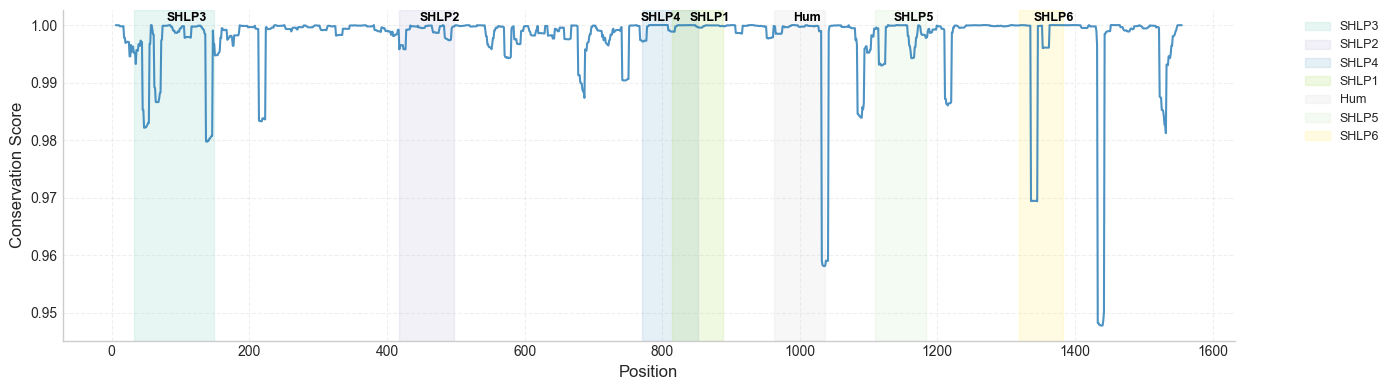

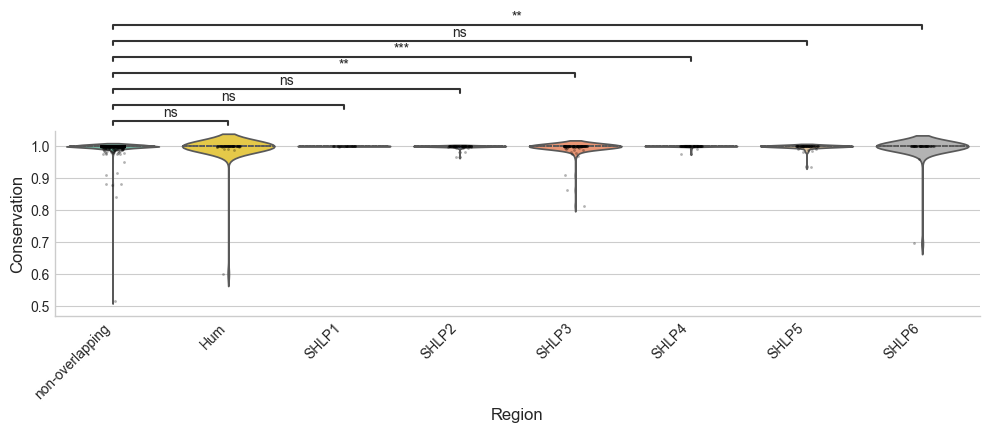

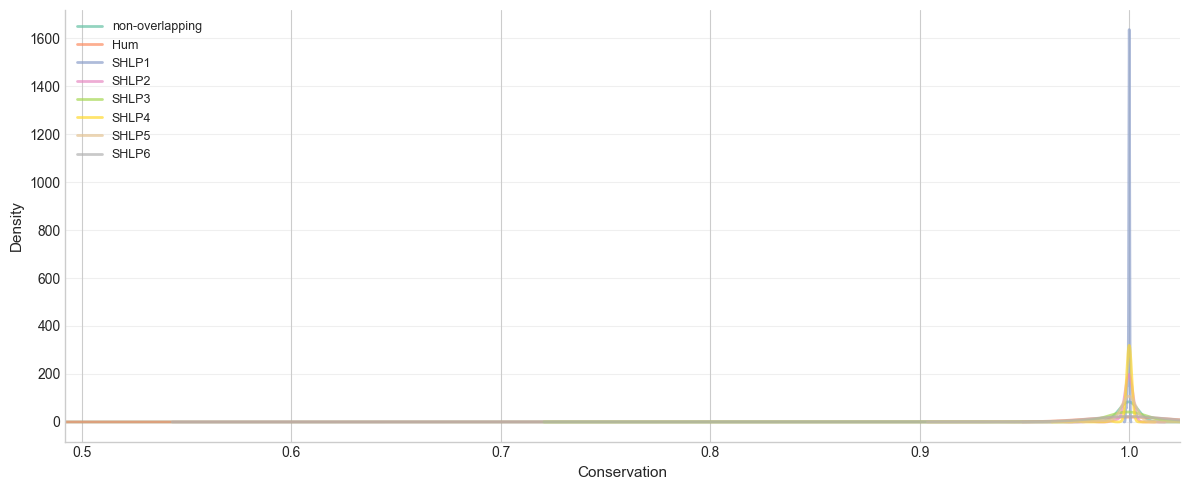

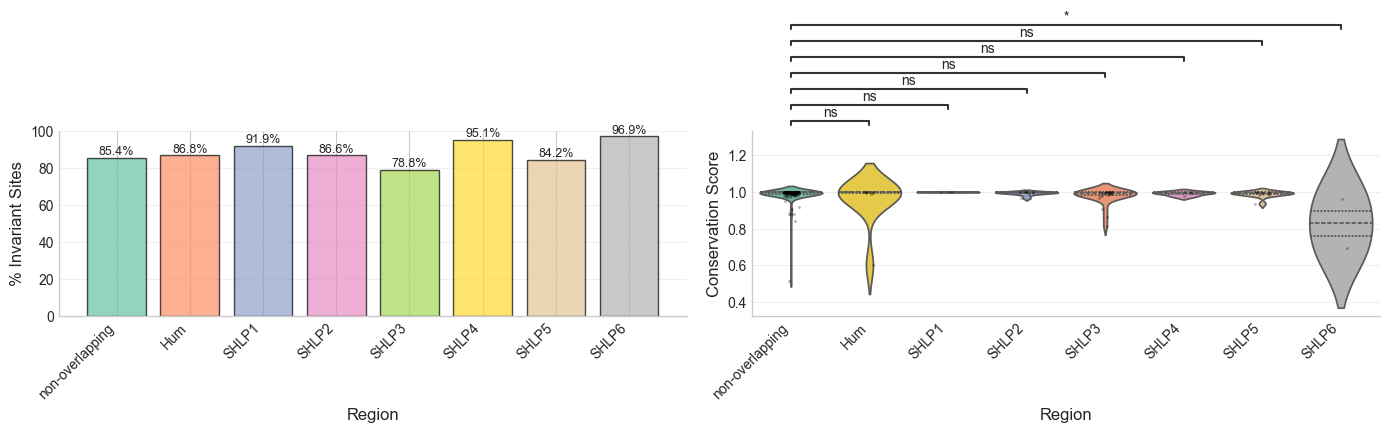

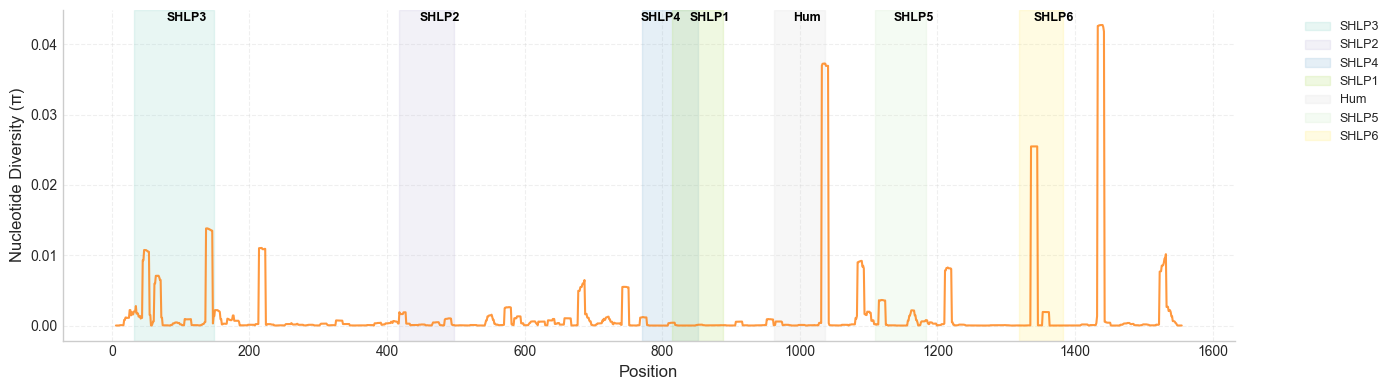

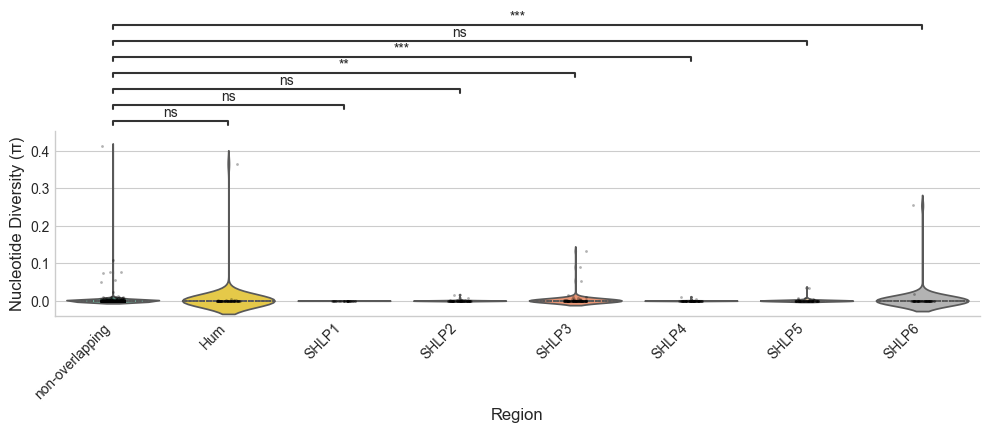

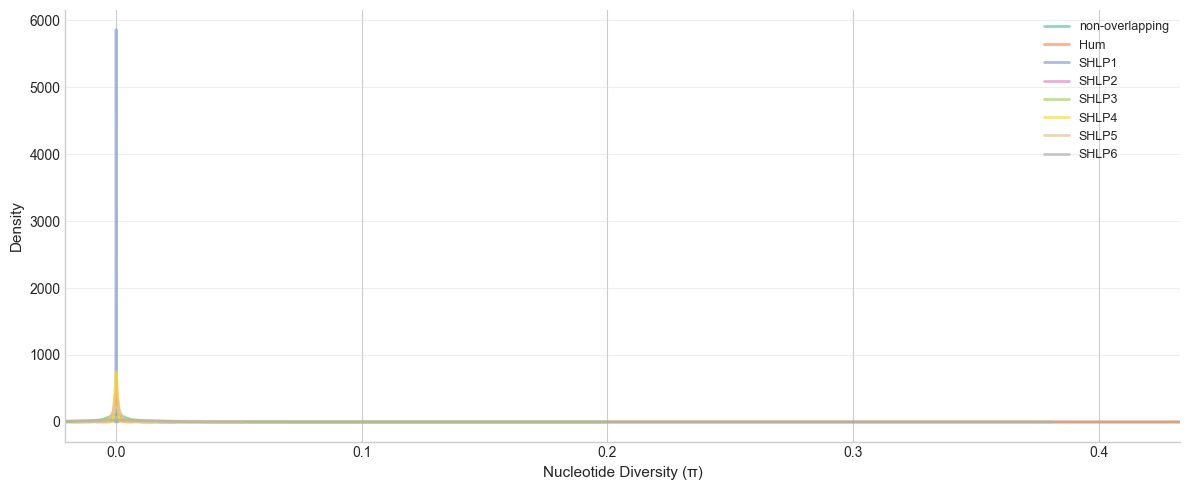

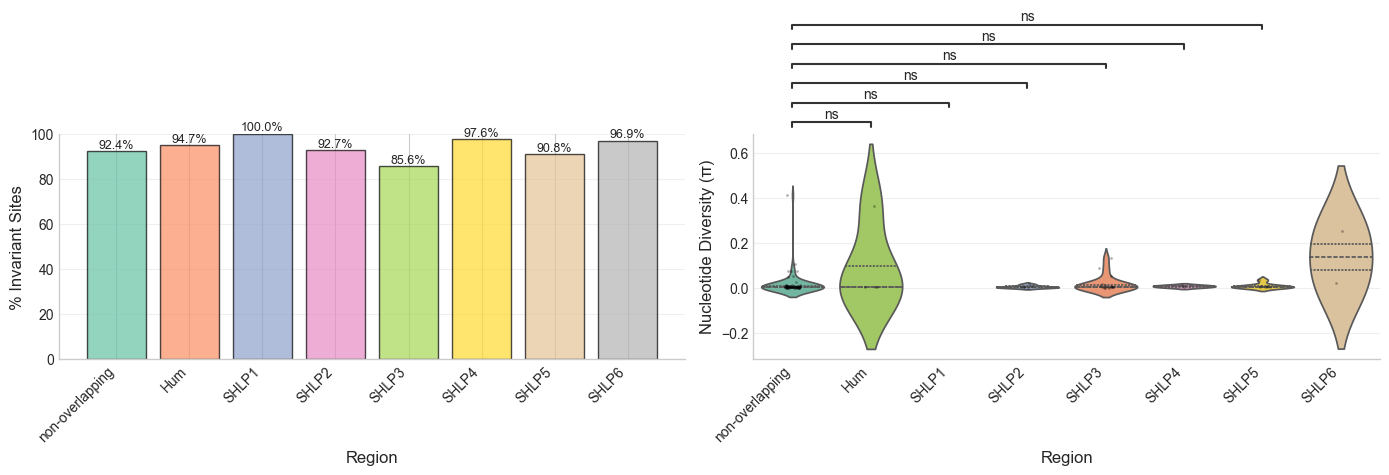

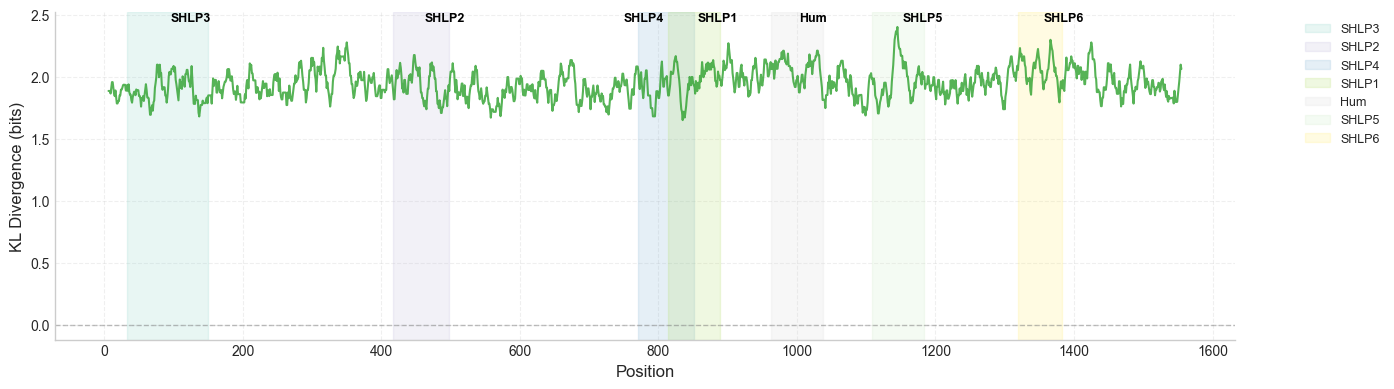

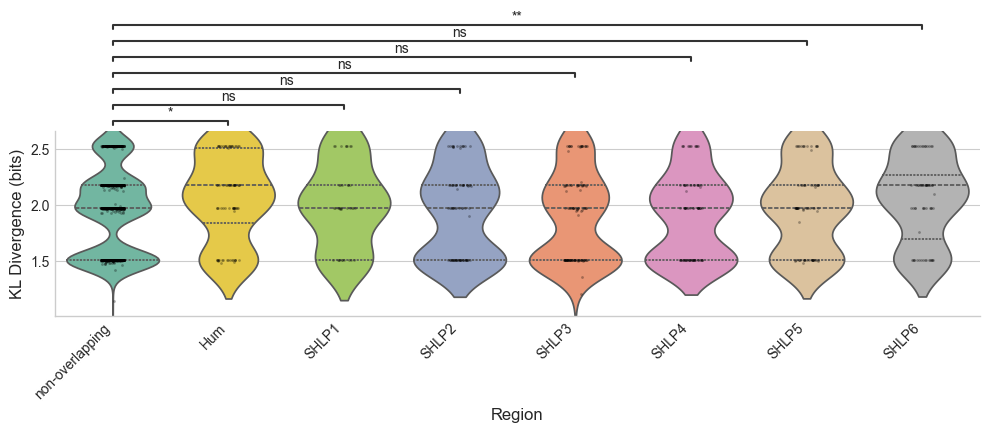

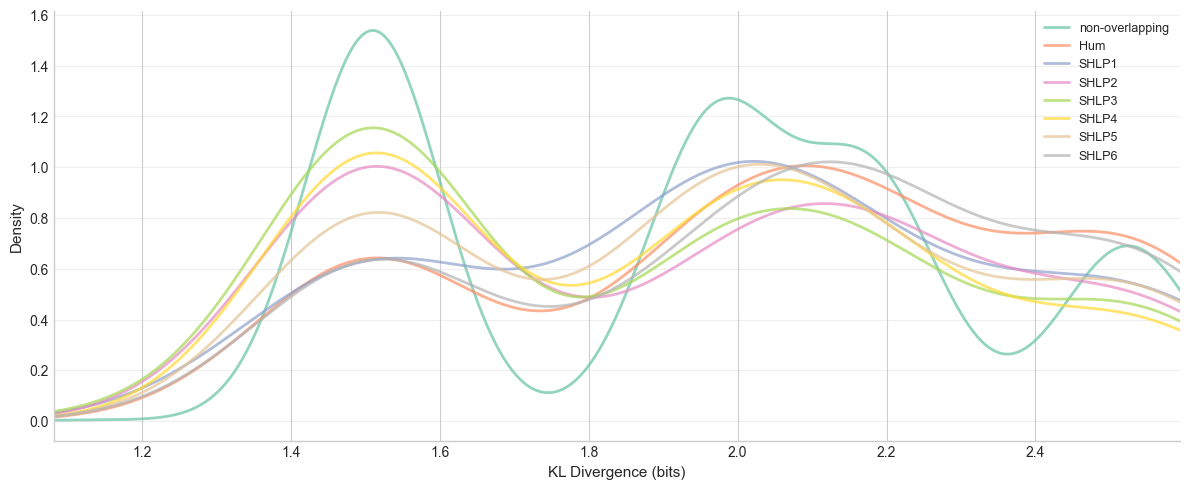

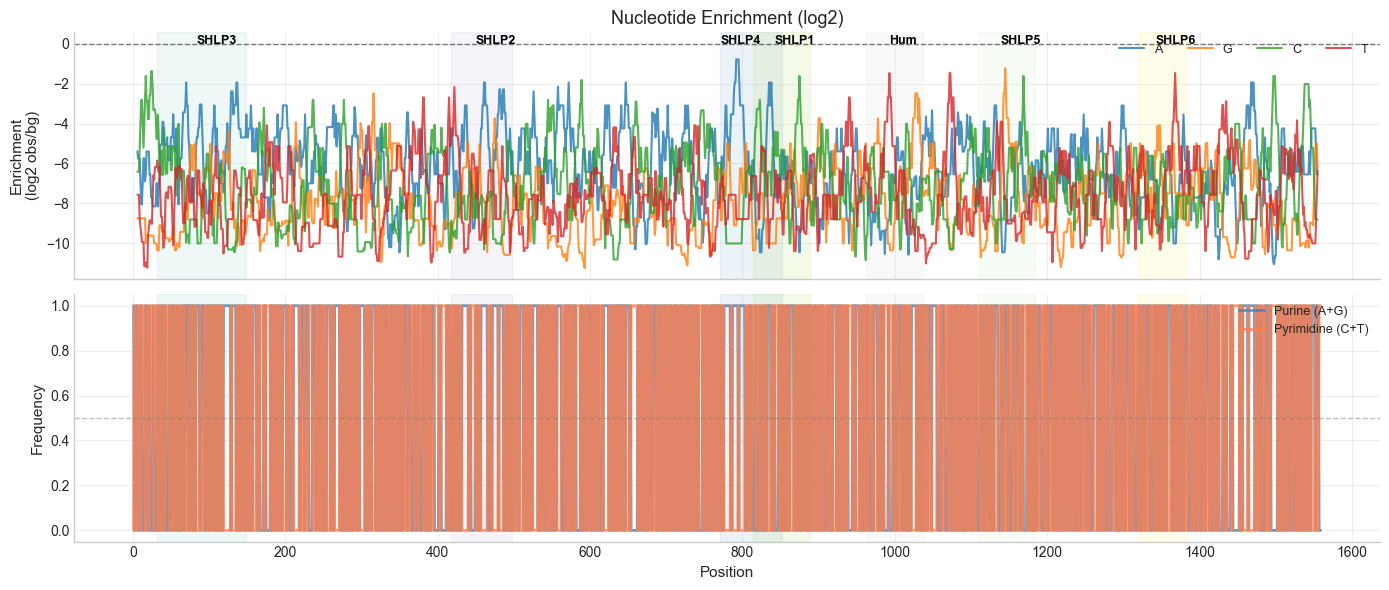

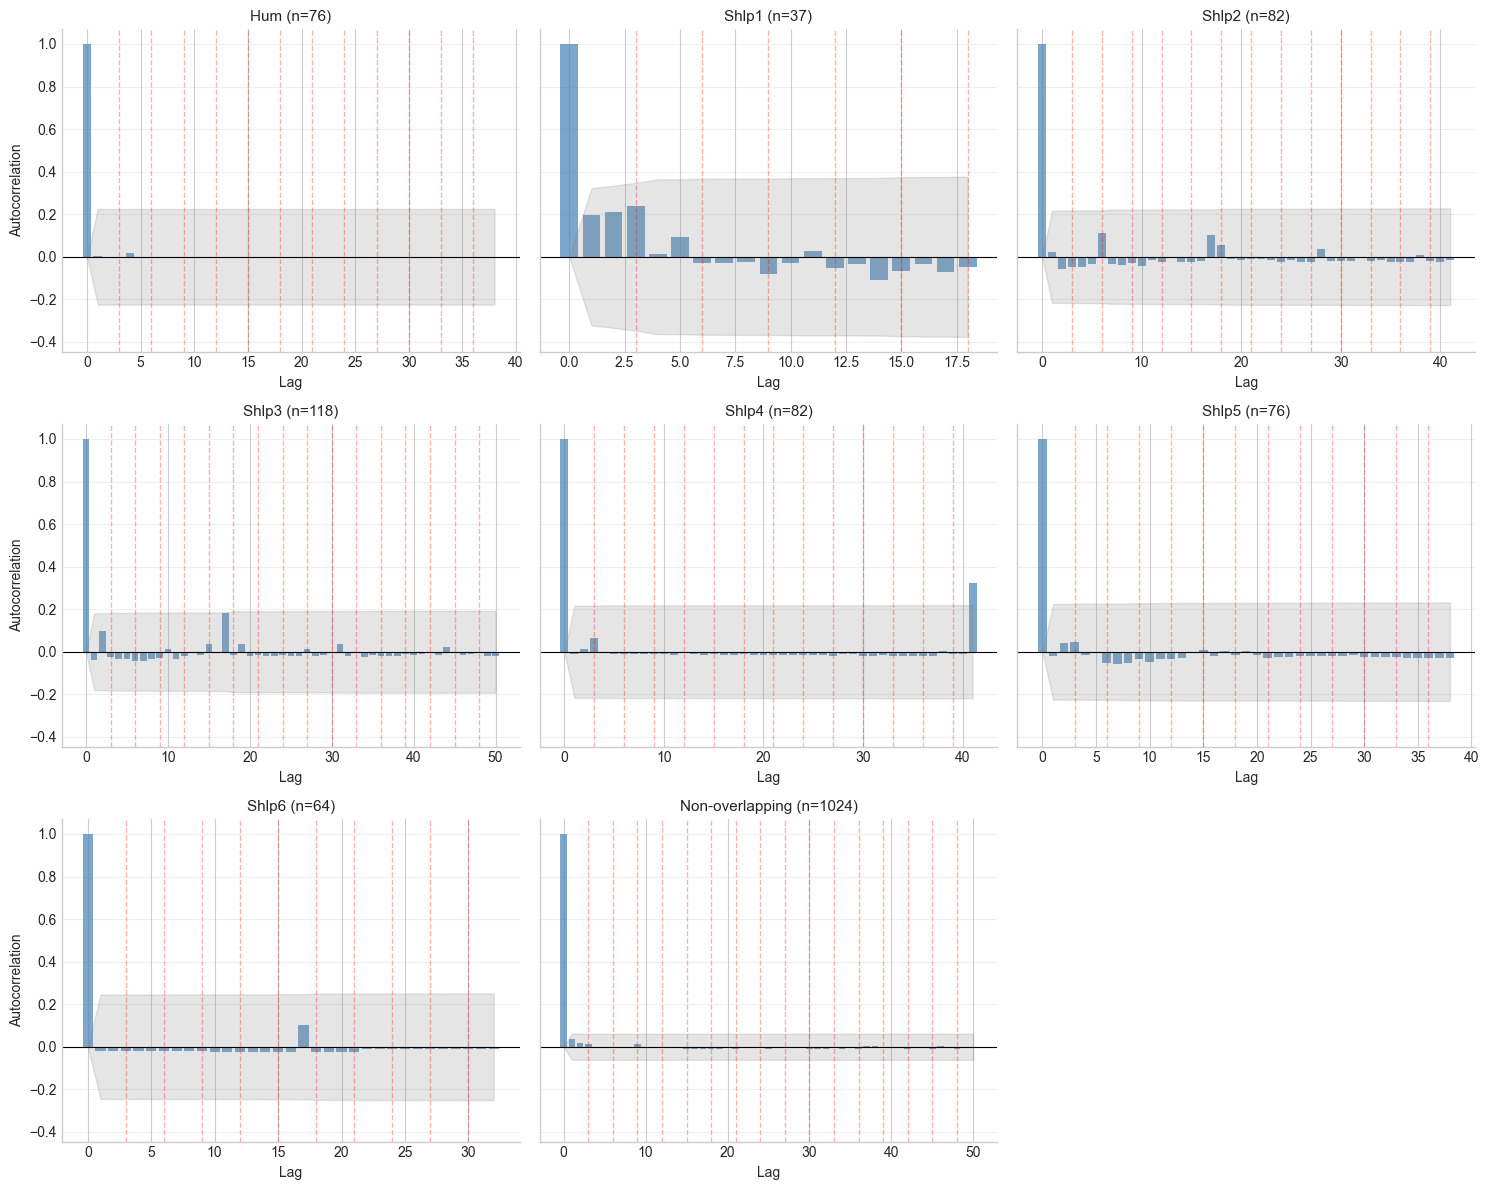

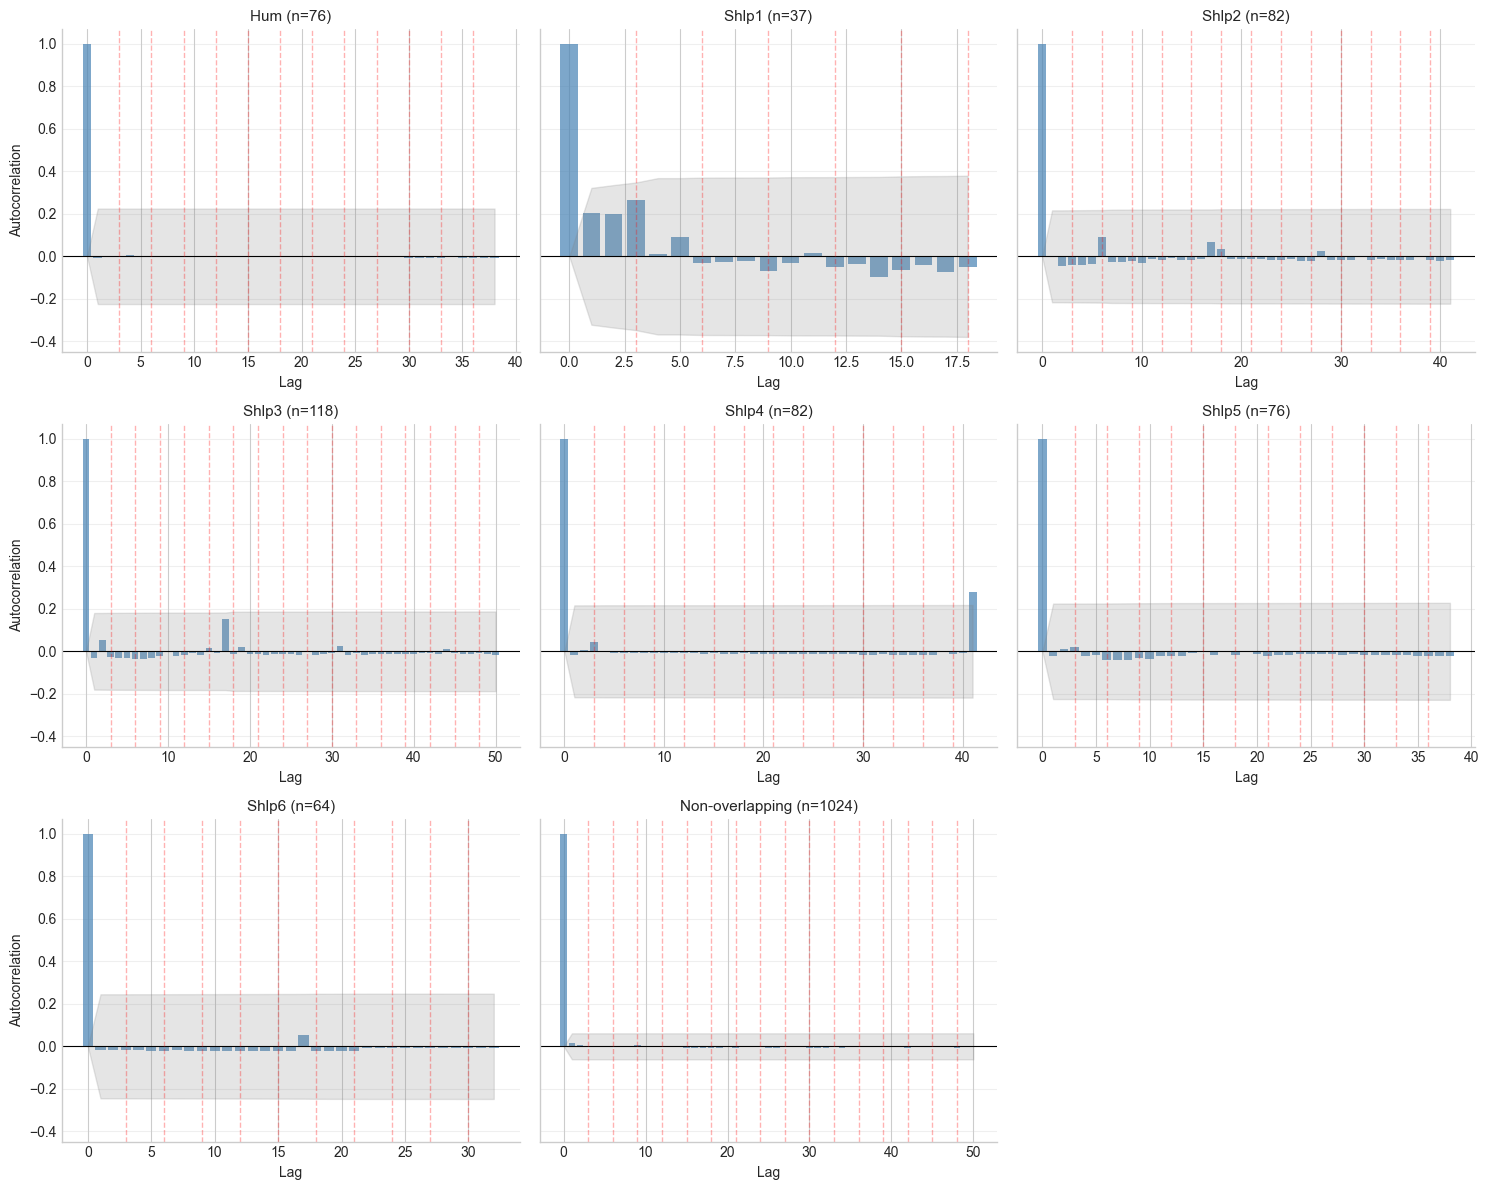

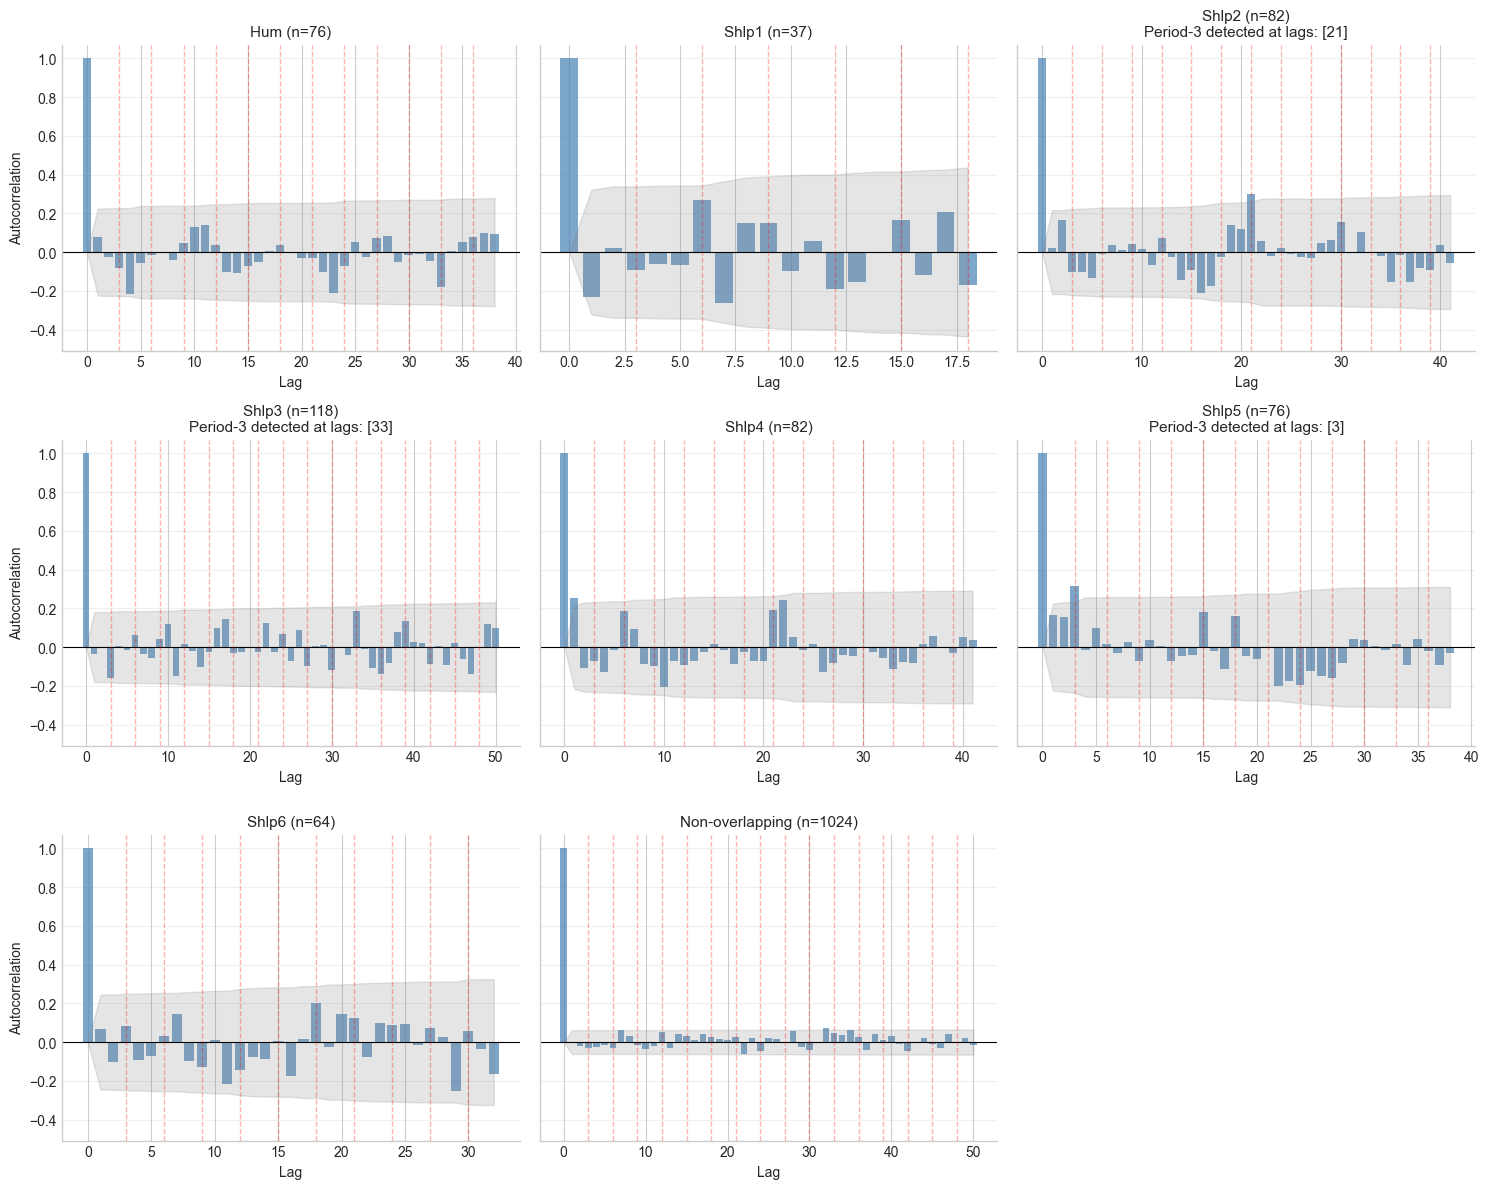

In [63]:
reload(rcd)

rnr2_cons_profile = rcd.analyze_gene_regions(
    df = df,
    gene_col = 'RNR2',
    overlapping_regions=relative_overlaps_dict['rnr2_overlaps_rel'],
    calculate_conservation= True,
    calculate_diversity= True,
    calculate_kl_divergence = True,
    calculate_composition= True,
    run_autocorrelation=True,
    autocorr_by_region_name= True,
    plot_density_comparison= True,
    plot_split_view= True,
    plot_results= True,
    window_size = 10,
    compare_distributions= True,
    output_dir=os.path.join(PATH, 'figures', 'revision', 'conservation_analysis_rnr2'),
    show_title = False
    )

Calculating per-position conservation for RNR1...
Plotting conservation...
Comparing conservation distributions...
Creating conservation density comparison...
Creating conservation split-view comparison...
Calculating per-position diversity for RNR1...
Plotting diversity...
Comparing diversity distributions...
Creating diversity density comparison...
Creating diversity split-view comparison...
Calculating per-position KL divergence for RNR1...
Plotting KL divergence...
Comparing KL divergence distributions...
Creating KL divergence density comparison...
Calculating nucleotide composition enrichment for RNR1...
Plotting nucleotide enrichment...
Calculating autocorrelation for periodic pattern detection...
  - Conservation autocorrelation...
  - Diversity autocorrelation...
  - KL divergence autocorrelation...
Analysis complete!


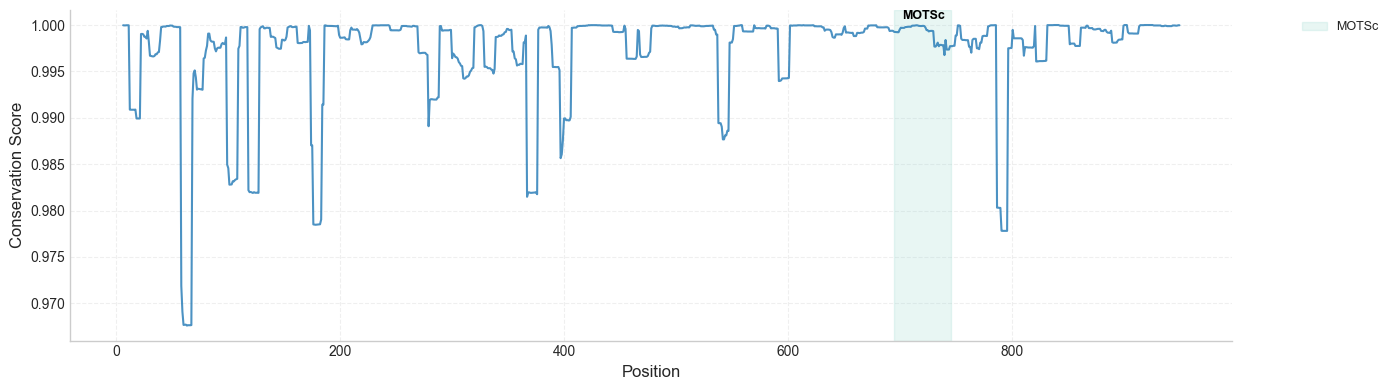

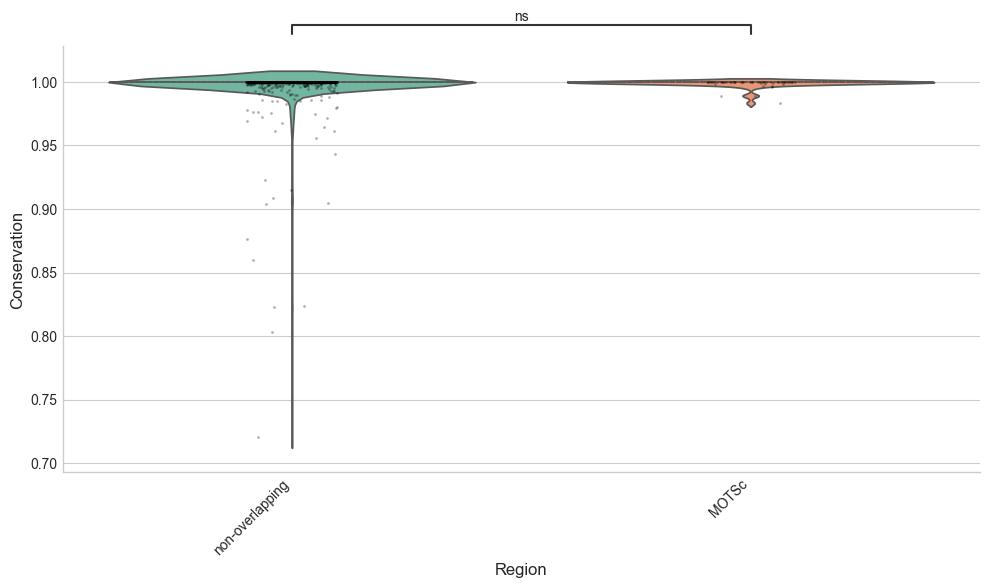

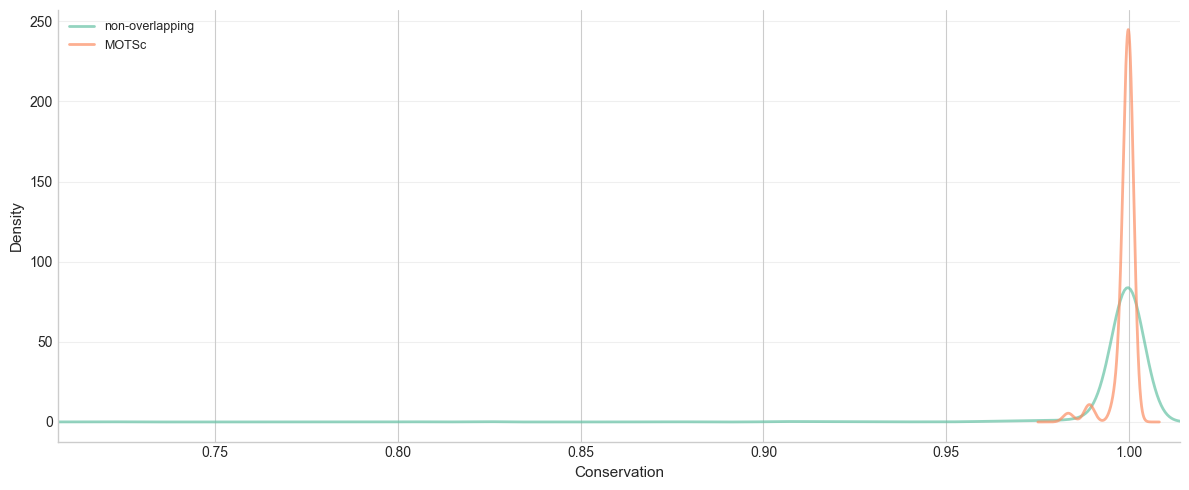

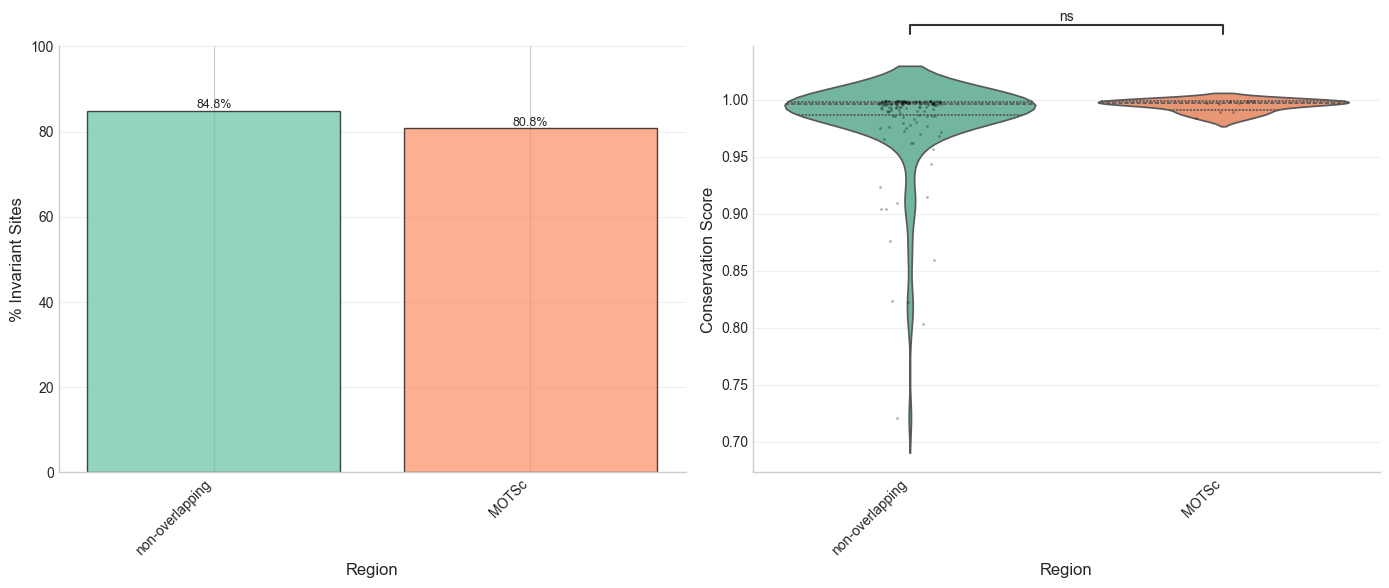

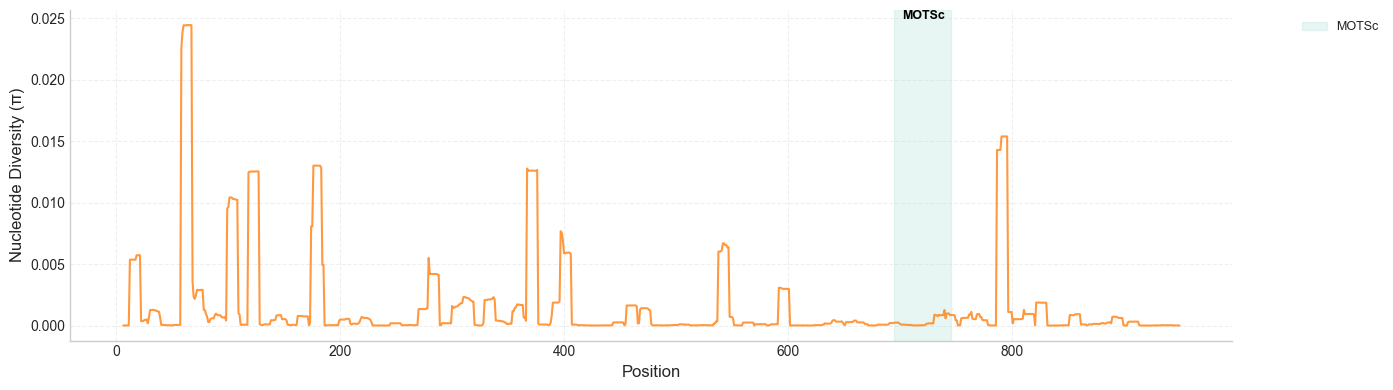

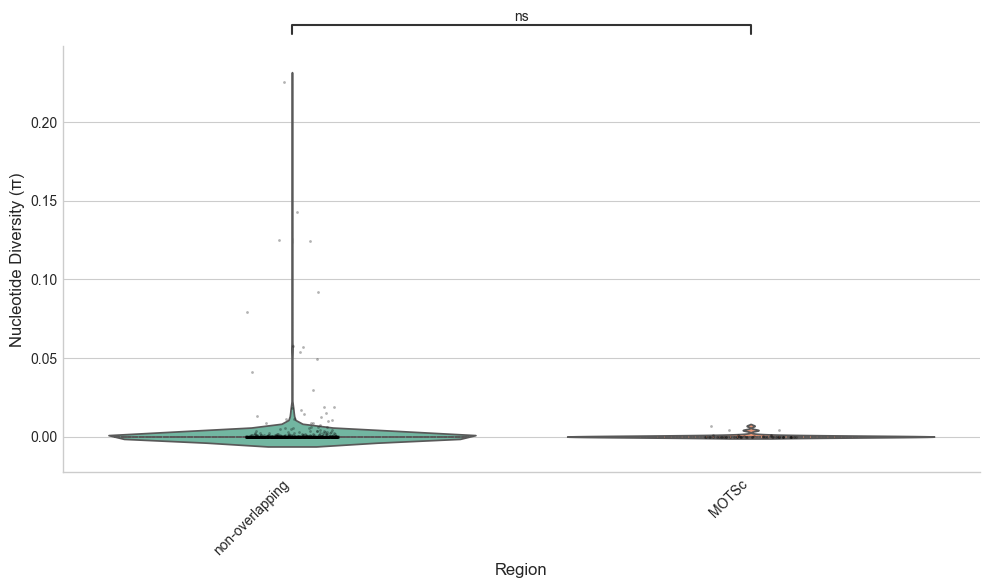

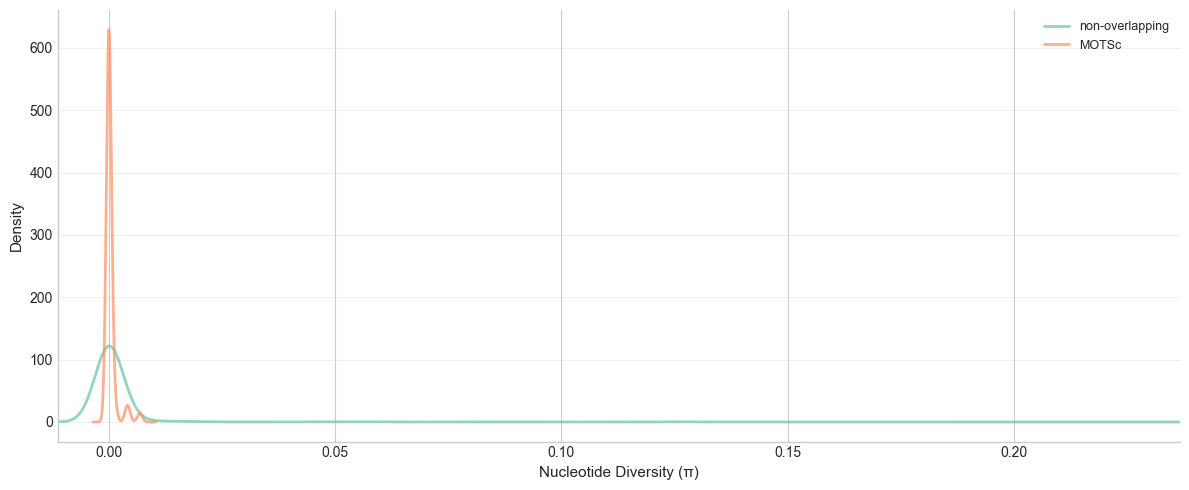

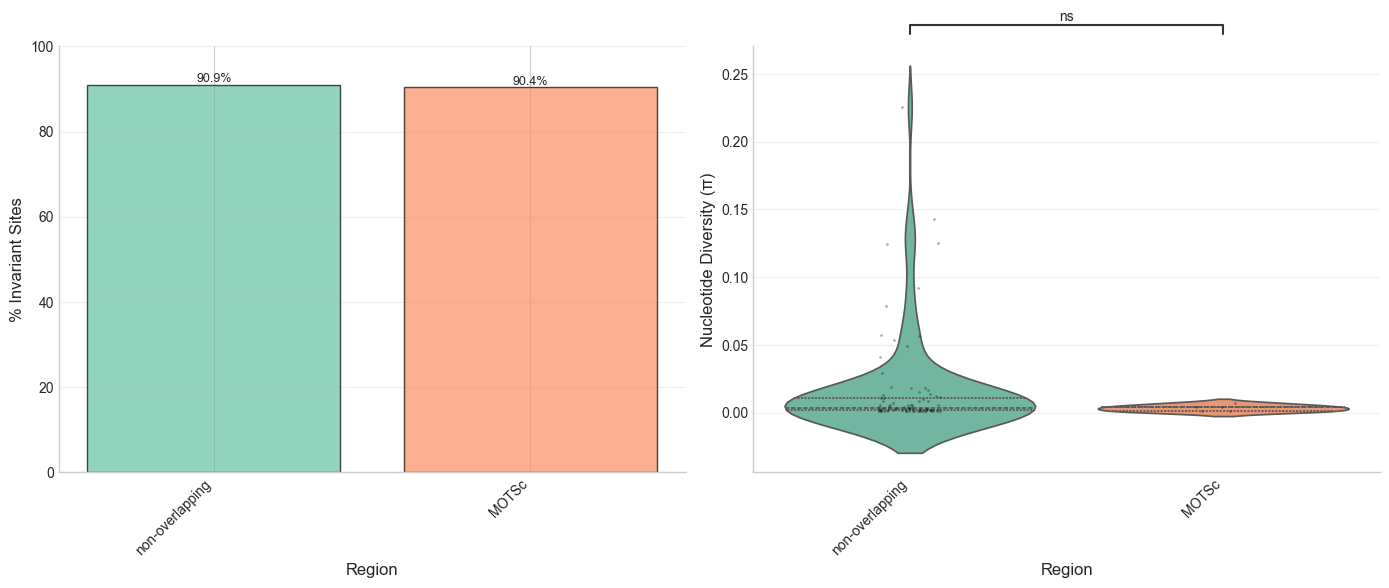

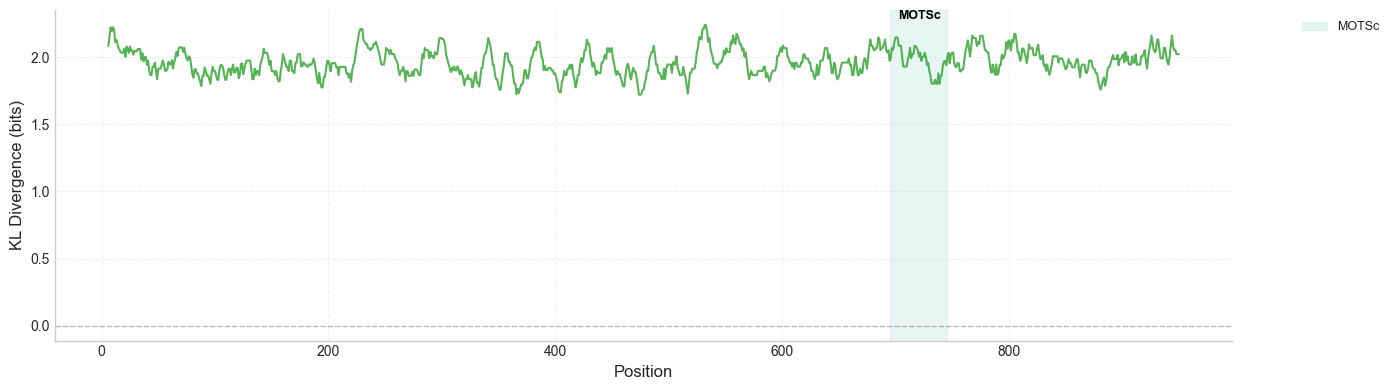

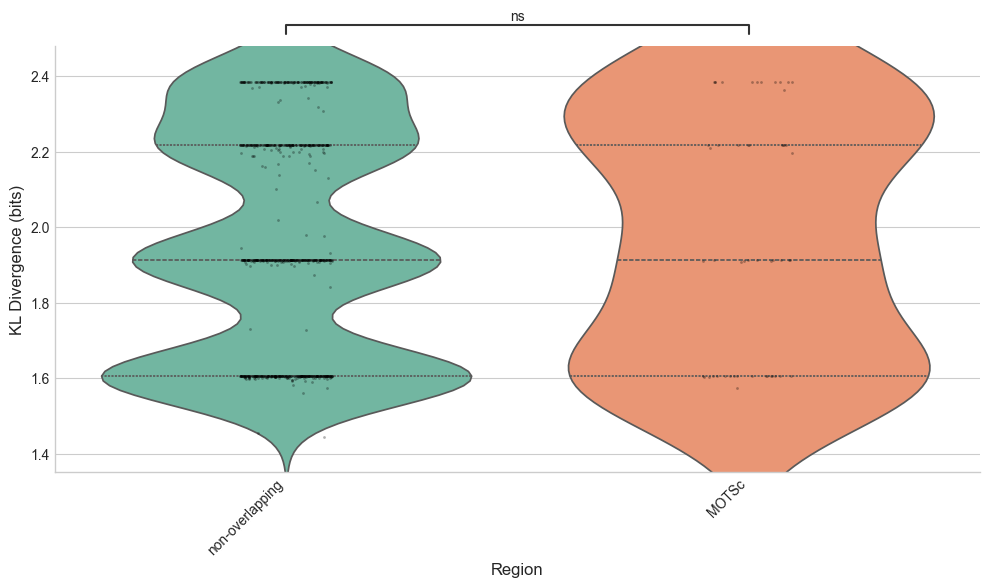

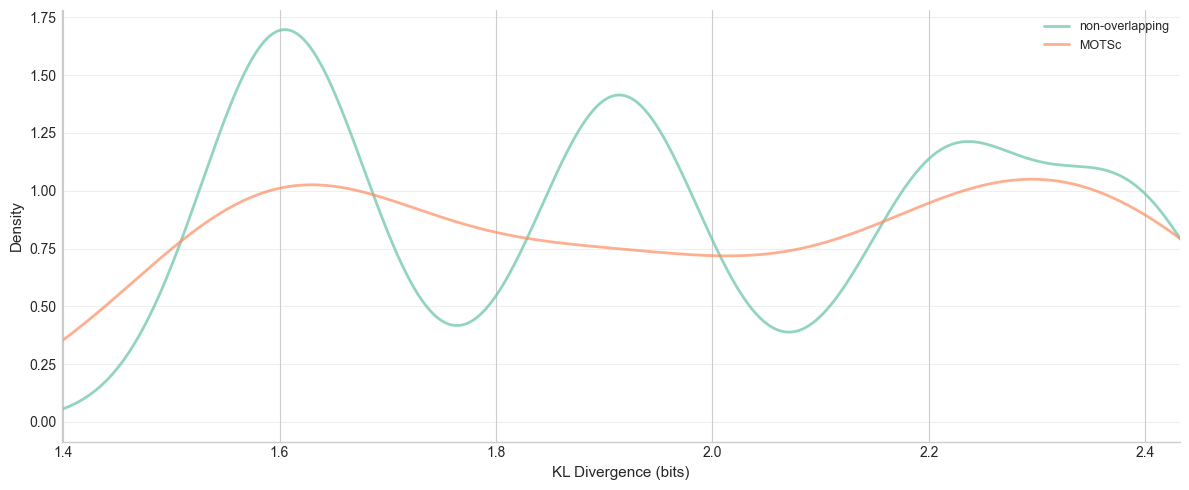

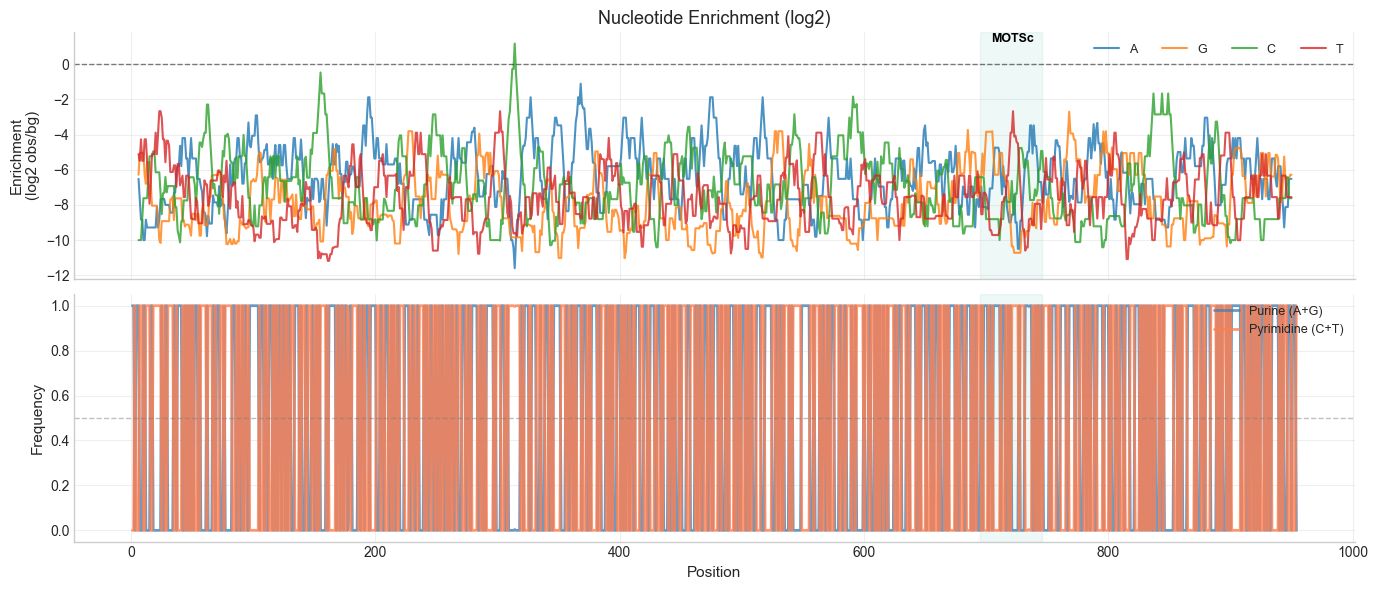

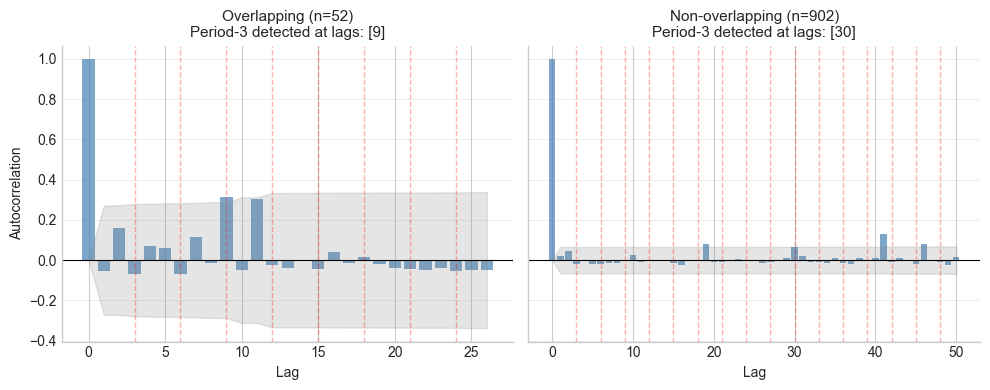

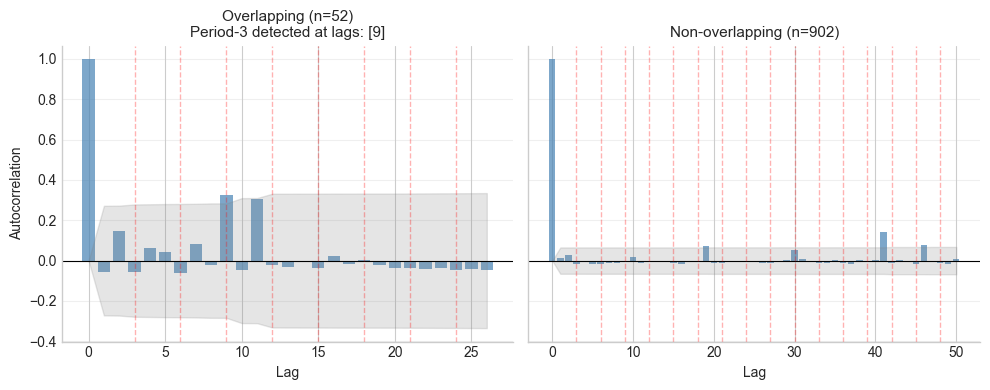

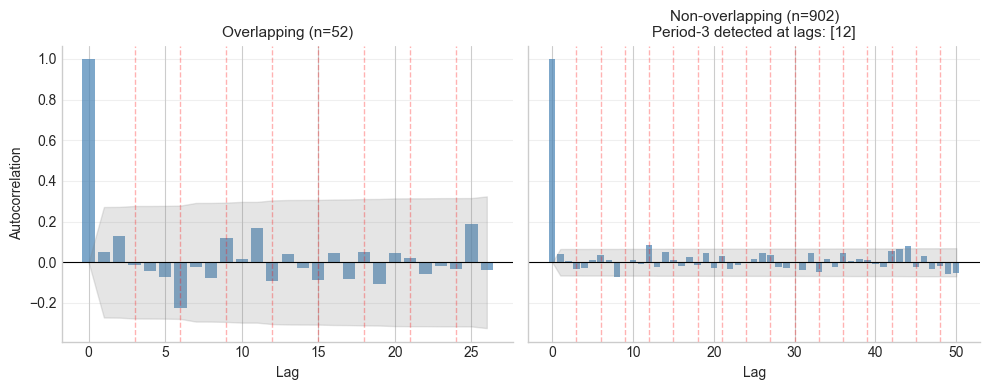

In [64]:
reload(rcd)

rnr1_cons_profile = rcd.analyze_gene_regions(
    df = df,
    gene_col = 'RNR1',
    overlapping_regions=relative_overlaps_dict['rnr1_overlaps_rel'],
    calculate_conservation= True,
    calculate_diversity= True,
    calculate_kl_divergence = True,
    calculate_composition= True,
    run_autocorrelation=True,
    plot_density_comparison= True,
    plot_split_view= True,
    plot_results= True,
    window_size = 10,
    compare_distributions= True,
    output_dir=os.path.join(PATH, 'figures', 'revision', 'conservation_analysis_rnr1'),
    show_title = False
)

In [65]:
#Merge the nested lists of co1_overlaps_rel with gau_overlaps_rel
relative_overlaps_dict['co1_gau_overlaps_rel'] = relative_overlaps_dict['co1_overlaps_rel'] + relative_overlaps_dict['gau_overlaps_rel']

Calculating per-position conservation for COX1...
Plotting conservation...
Comparing conservation distributions...
Creating conservation density comparison...
Creating conservation split-view comparison...
Calculating per-position diversity for COX1...
Plotting diversity...
Comparing diversity distributions...
Creating diversity density comparison...
Creating diversity split-view comparison...
Calculating per-position KL divergence for COX1...
Plotting KL divergence...
Comparing KL divergence distributions...
Creating KL divergence density comparison...
Calculating nucleotide composition enrichment for COX1...
Plotting nucleotide enrichment...
Calculating autocorrelation for periodic pattern detection...
  - Conservation autocorrelation...
  - Diversity autocorrelation...
  - KL divergence autocorrelation...
Analysis complete!


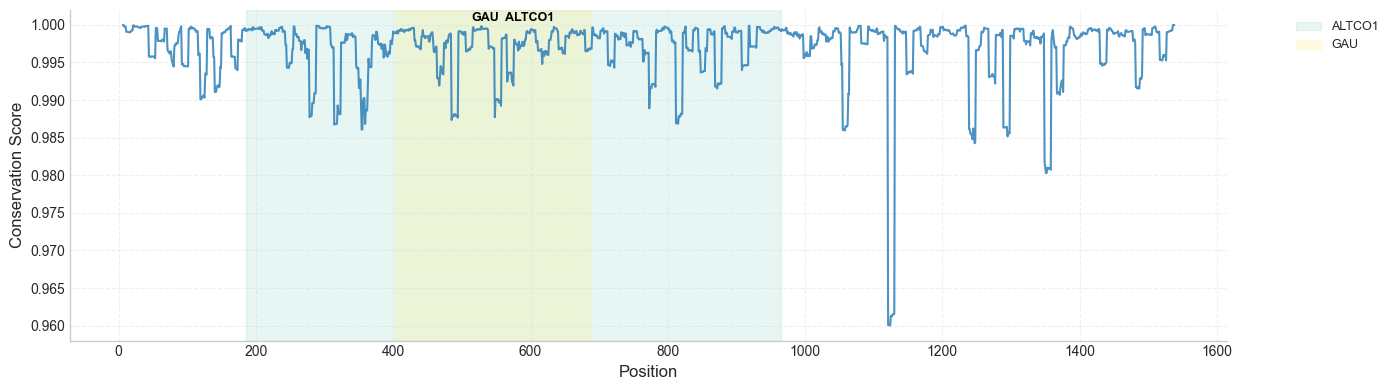

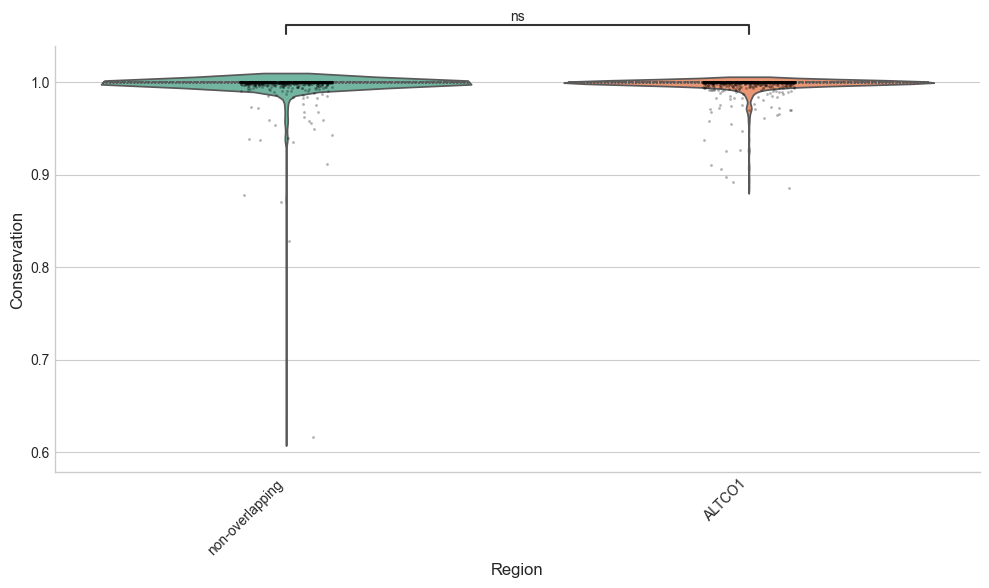

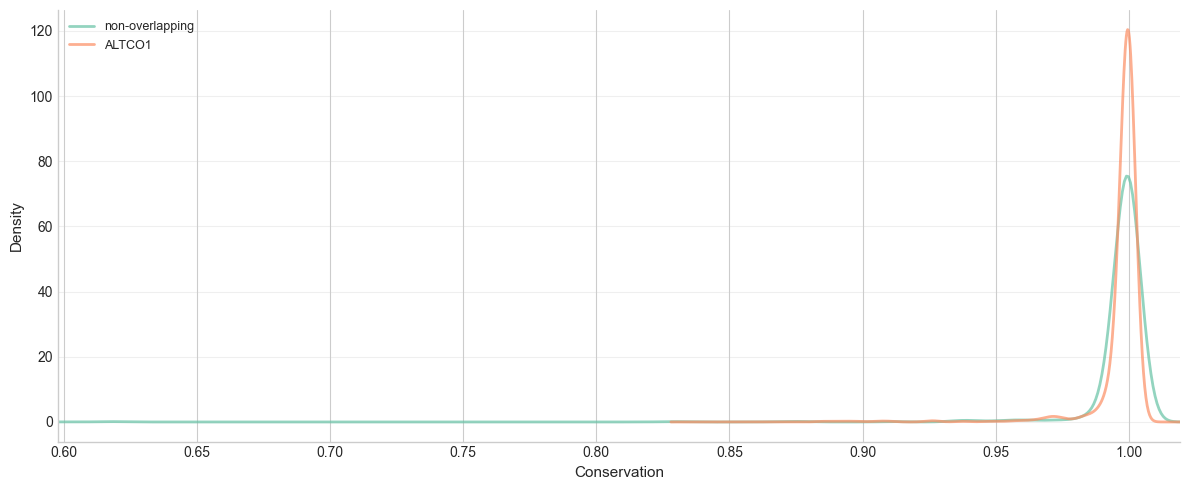

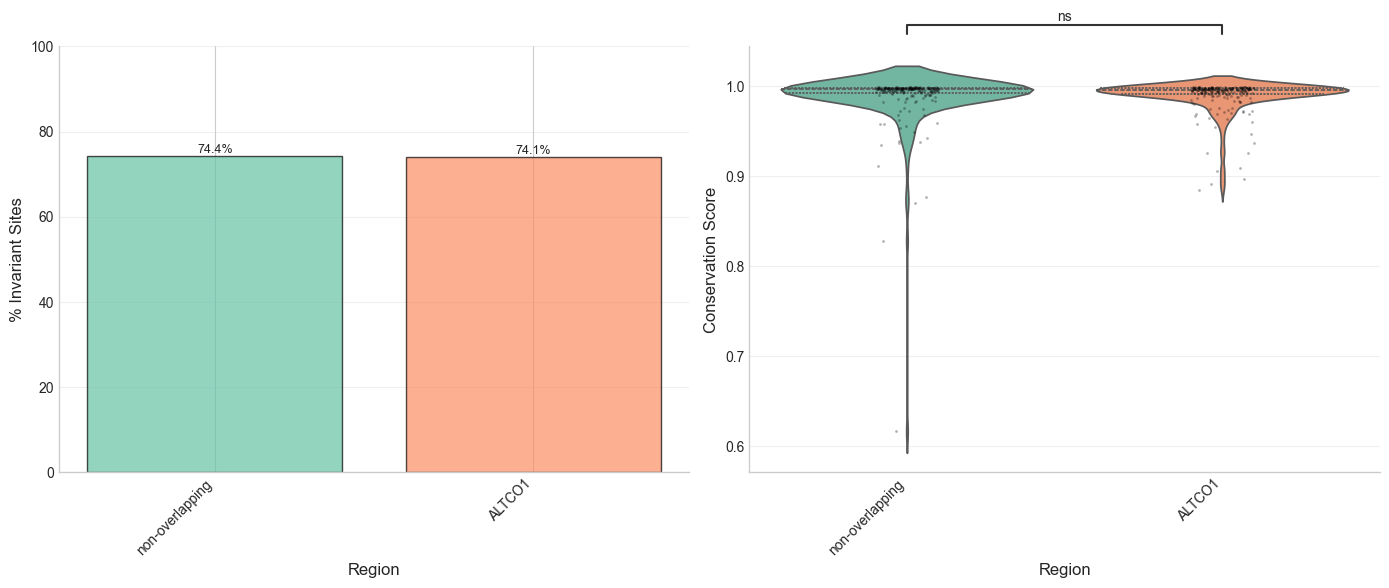

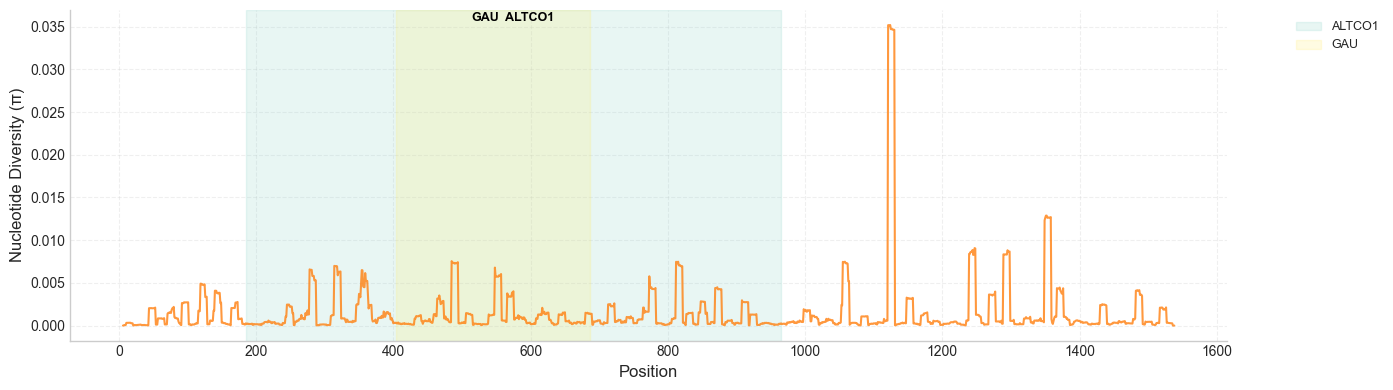

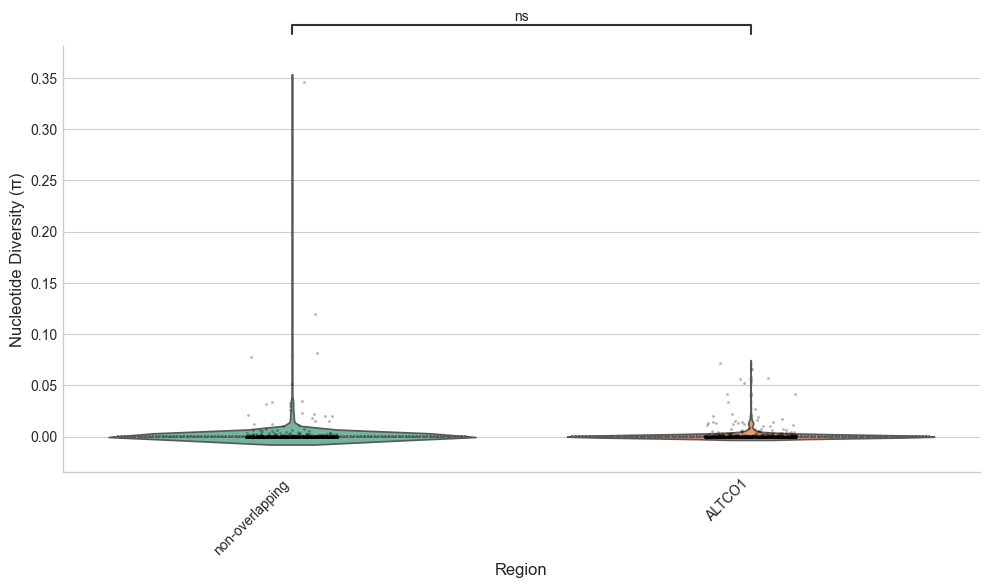

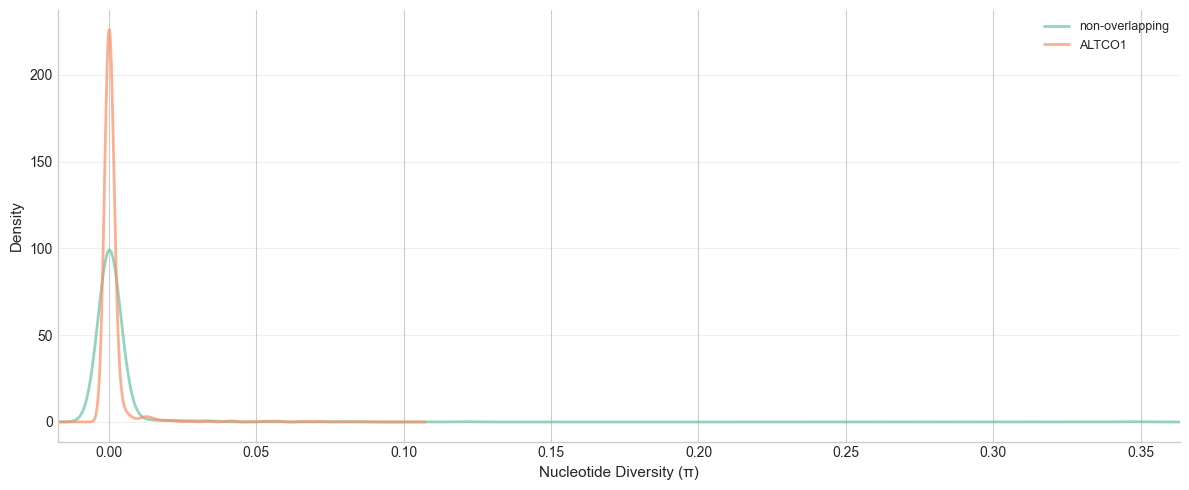

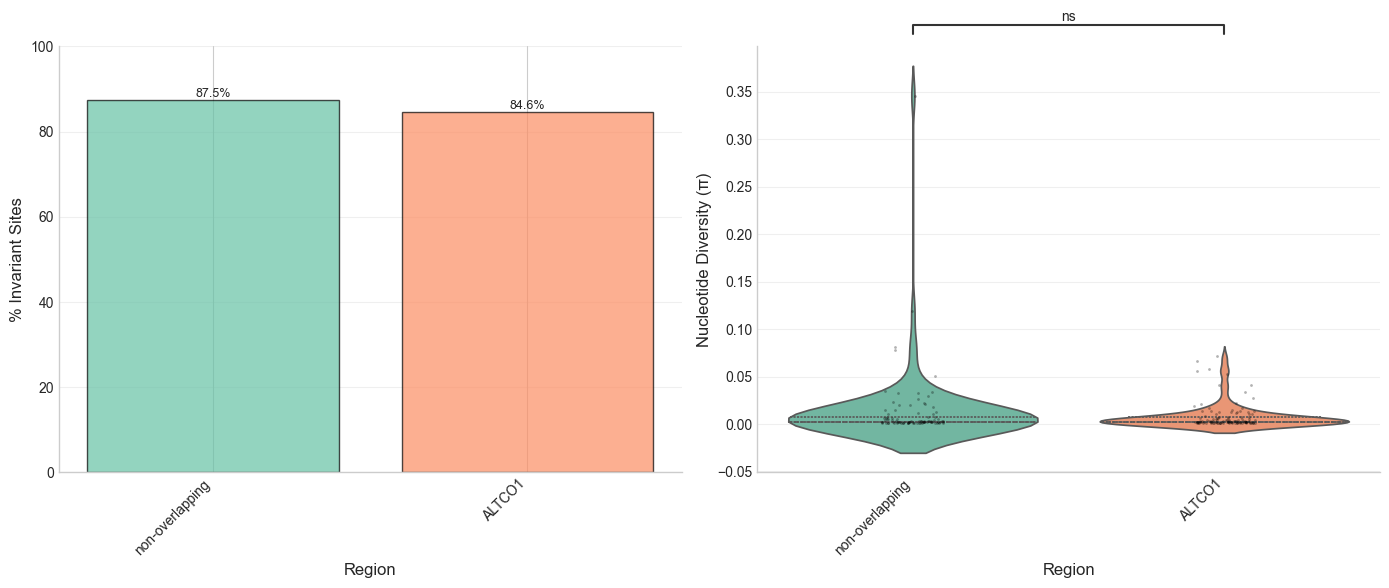

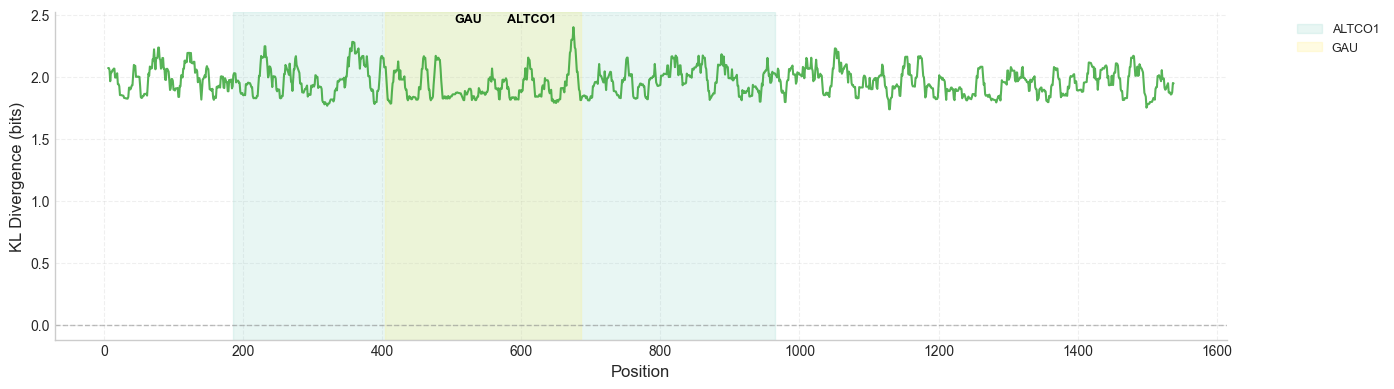

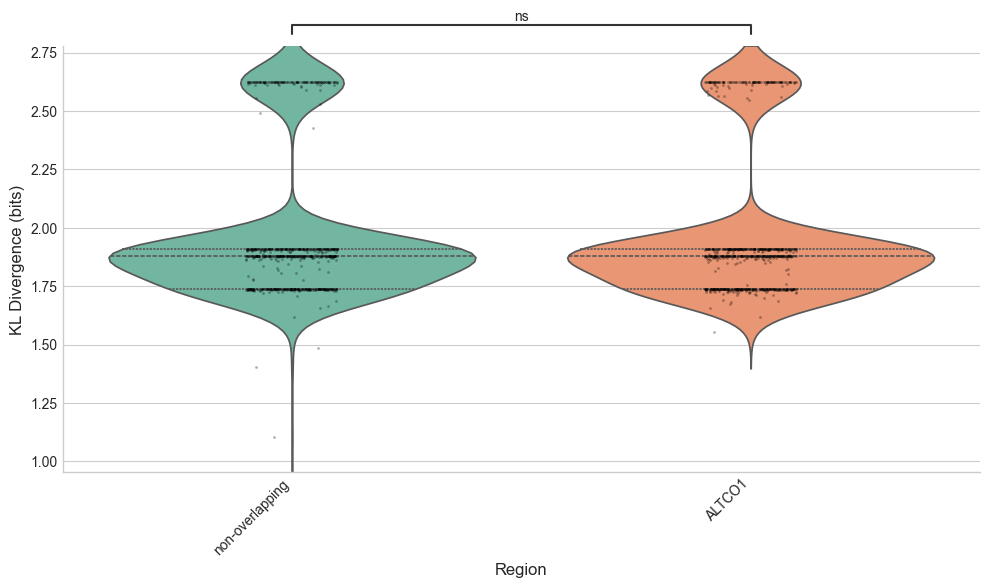

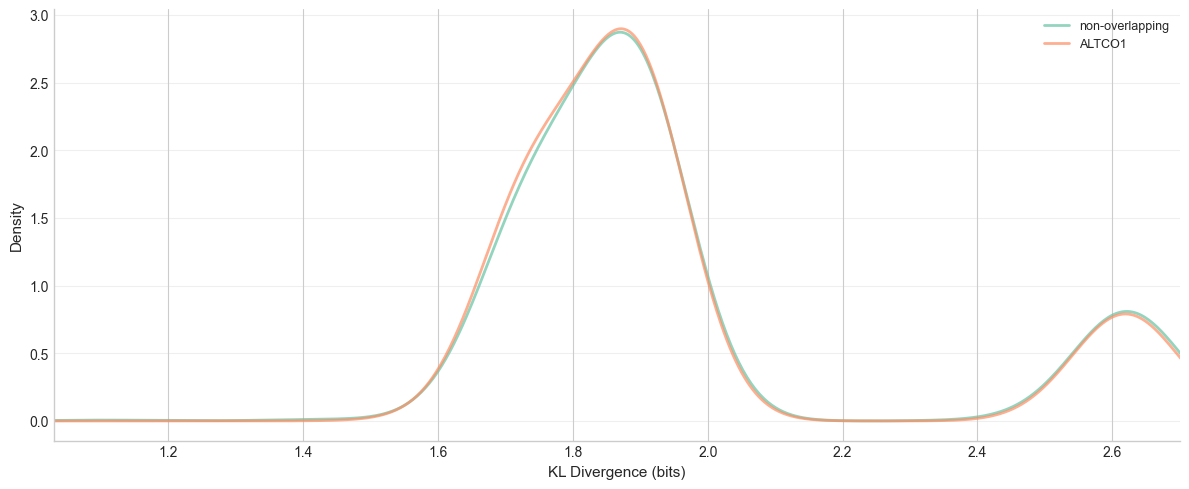

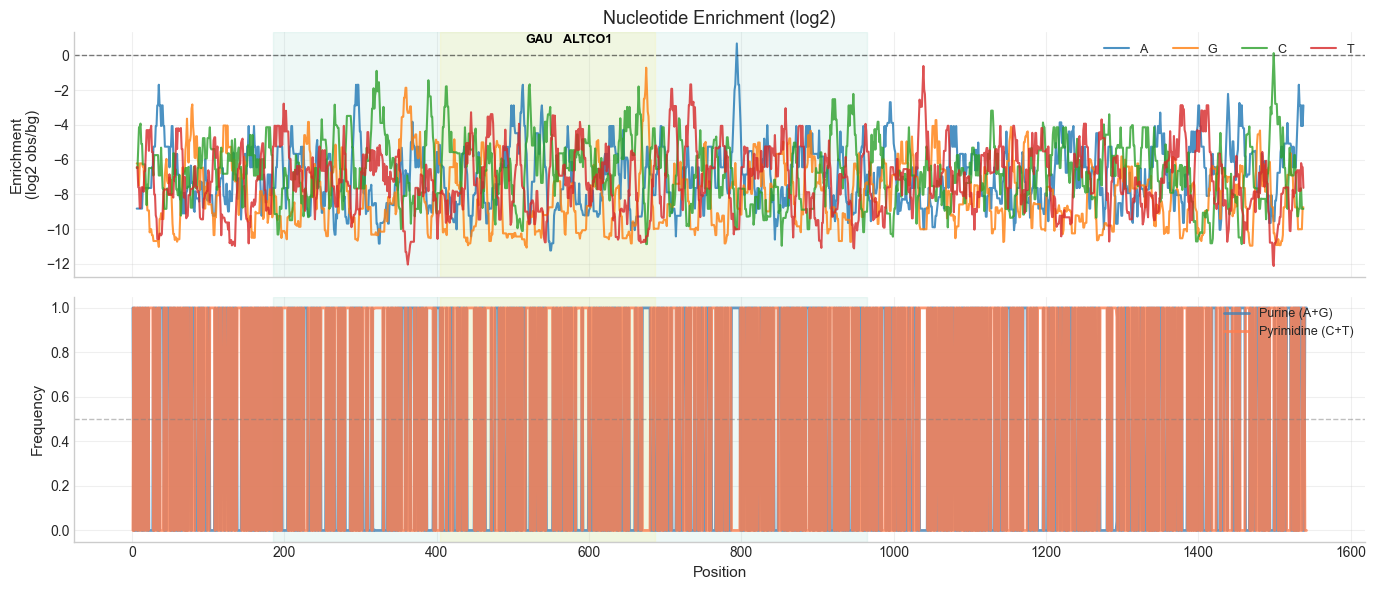

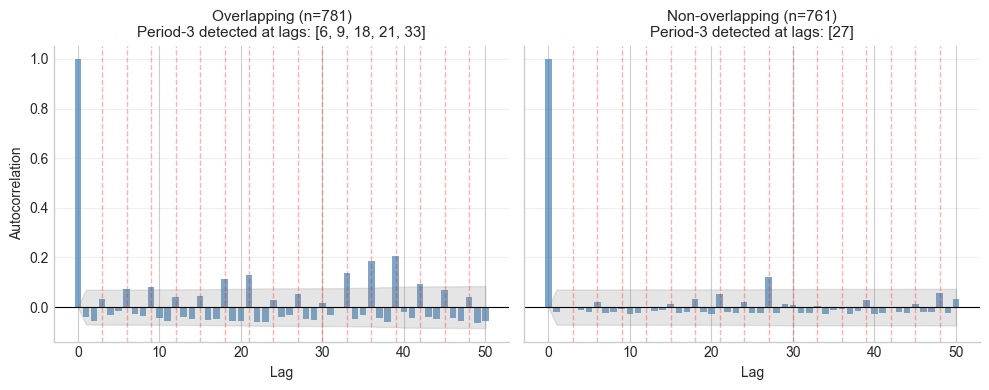

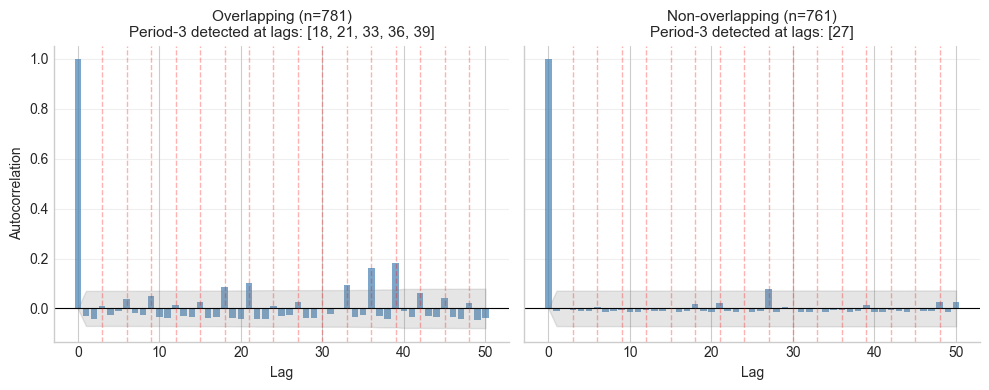

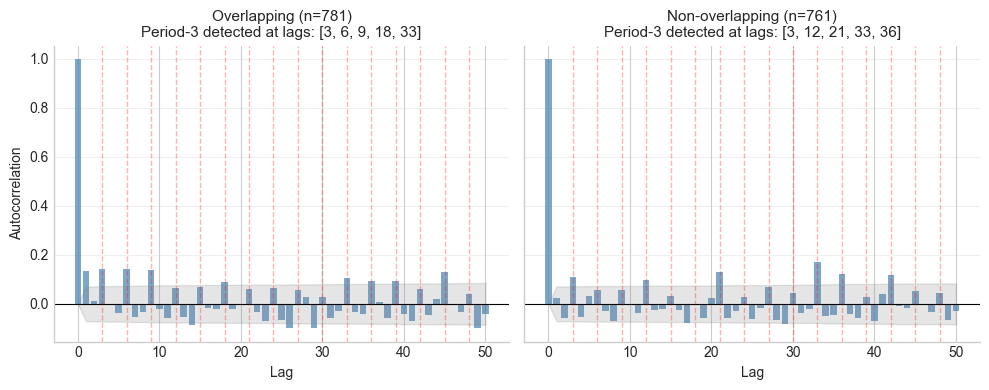

In [66]:
reload(rcd)

cox1_cons_profile = rcd.analyze_gene_regions(
    df = df,
    gene_col = 'COX1',
    overlapping_regions=relative_overlaps_dict['co1_gau_overlaps_rel'],
    calculate_conservation= True,
    calculate_diversity= True,
    calculate_kl_divergence= True,
    run_autocorrelation=True,
    plot_density_comparison= True,
    plot_split_view= True,
    show_title = False,
    window_size = 10,
    plot_results= True,
    compare_distributions= True,
    output_dir=os.path.join(PATH, 'figures', 'revision', 'conservation_analysis_cox1')
)

In [67]:
relative_overlaps_dict

{'rnr2_overlaps_rel': [['SHLP3', 32, 149],
  ['SHLP2', 417, 498],
  ['SHLP4', 771, 852],
  ['SHLP1', 814, 889],
  ['Hum', 962, 1037],
  ['SHLP5', 1109, 1184],
  ['SHLP6', 1319, 1382]],
 'rnr1_overlaps_rel': [['MOTSc', 695, 746]],
 'co1_overlaps_rel': [['ALTCO1', 185, 965]],
 'gau_overlaps_rel': [['GAU', 404, 686]],
 'shmoose_overlaps_rel': [['SHMOOSE', 27, 204]],
 'nad4_overlaps_rel': [['ALTND4', 797, 1097]],
 'nad4L_nad4_overlaps_rel': [['Overlap Region', 290, 297]],
 'atp8_atp6_overlaps_rel': [['Overlap Region', 161, 207]],
 'cyb_overlaps_rel': [['CYTB-187AA', 86, 650]],
 'co1_gau_overlaps_rel': [['ALTCO1', 185, 965], ['GAU', 404, 686]]}

In [68]:
df.columns

Index(['ID', 'RNR2', 'RNR1', 'ATP8', 'ATP6', 'ATP8_ATP6', 'ND4L_ND4', 'ND4',
       'ND4L', 'COX1', 'CYTB', 'TS2_TL2_ND5', 'ND1', 'ND2', 'ND3', 'ND5',
       'ND6', 'COX2', 'COX3', 'Hum_seq', 'SHLP3_seq', 'SHLP2_seq', 'SHLP4_seq',
       'SHLP1_seq', 'SHLP5_seq', 'SHLP6_seq', 'MOTC_seq', 'GAU_seq',
       'shmoose_seq', 'CO1_alt_seq', 'ND4_alt_seq', 'CYB_alt_seq',
       'ATP8_6_overlap_seq_upstream', 'ATP8_6_overlap_seq_downstream',
       'ND4L_4_overlap_seq_upstream', 'ND4L_4_overlap_seq_downstream',
       'organism'],
      dtype='object')

Calculating per-position conservation for ND4...
Plotting conservation...
Comparing conservation distributions...
Creating conservation density comparison...
Creating conservation split-view comparison...
Calculating per-position diversity for ND4...
Plotting diversity...
Comparing diversity distributions...
Creating diversity density comparison...
Creating diversity split-view comparison...
Calculating per-position KL divergence for ND4...
Plotting KL divergence...
Comparing KL divergence distributions...
Creating KL divergence density comparison...
Calculating nucleotide composition enrichment for ND4...
Plotting nucleotide enrichment...
Calculating autocorrelation for periodic pattern detection...
  - Conservation autocorrelation...
  - Diversity autocorrelation...
  - KL divergence autocorrelation...
Analysis complete!


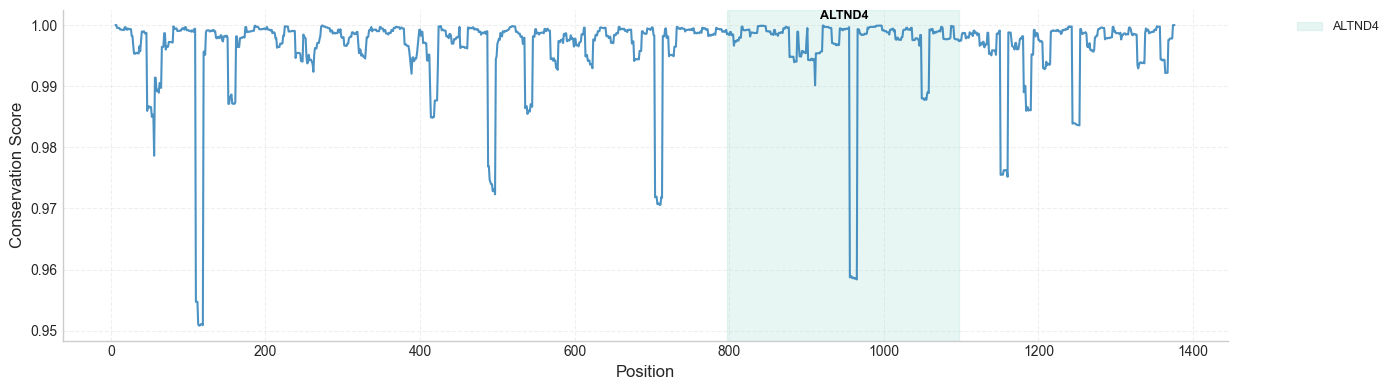

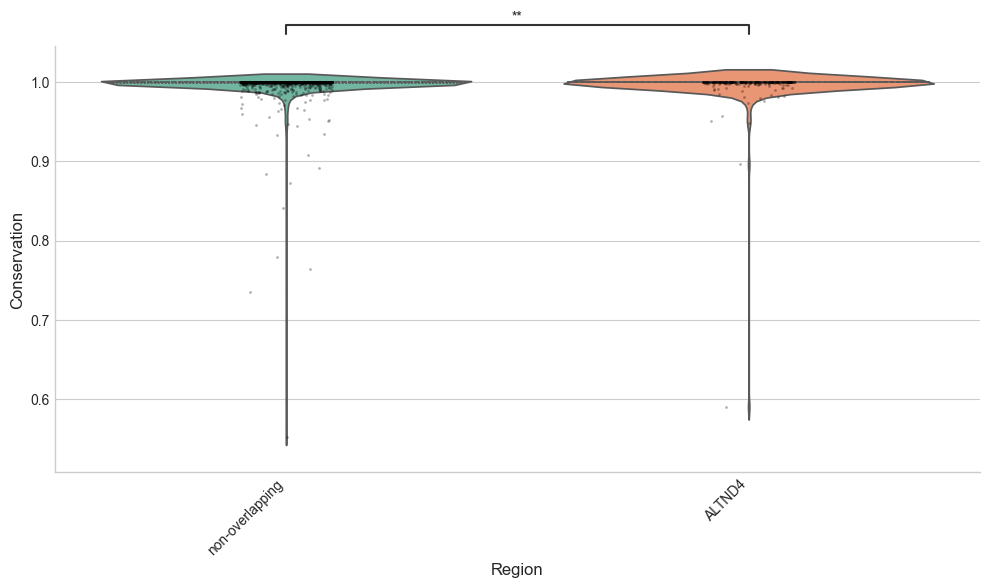

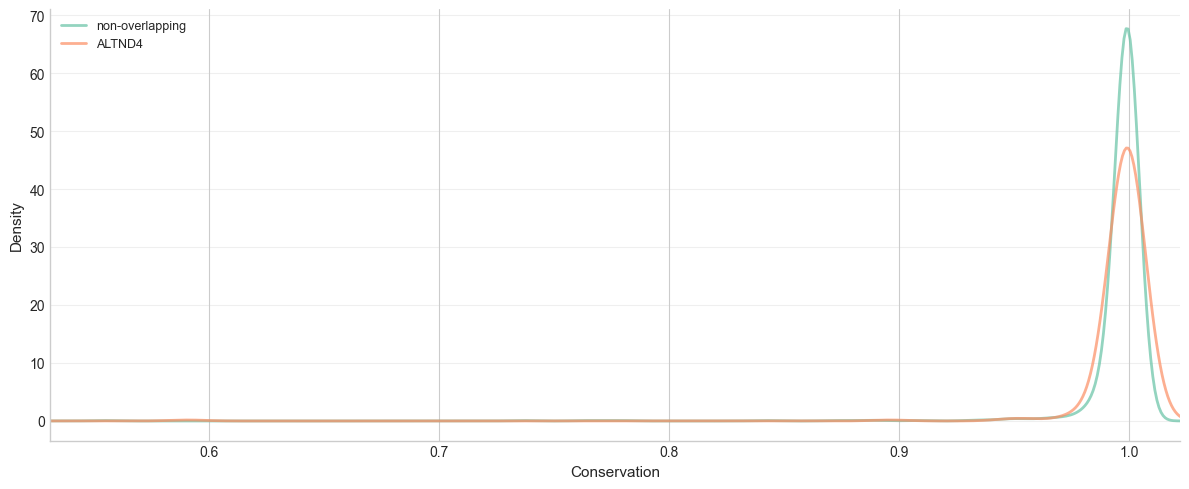

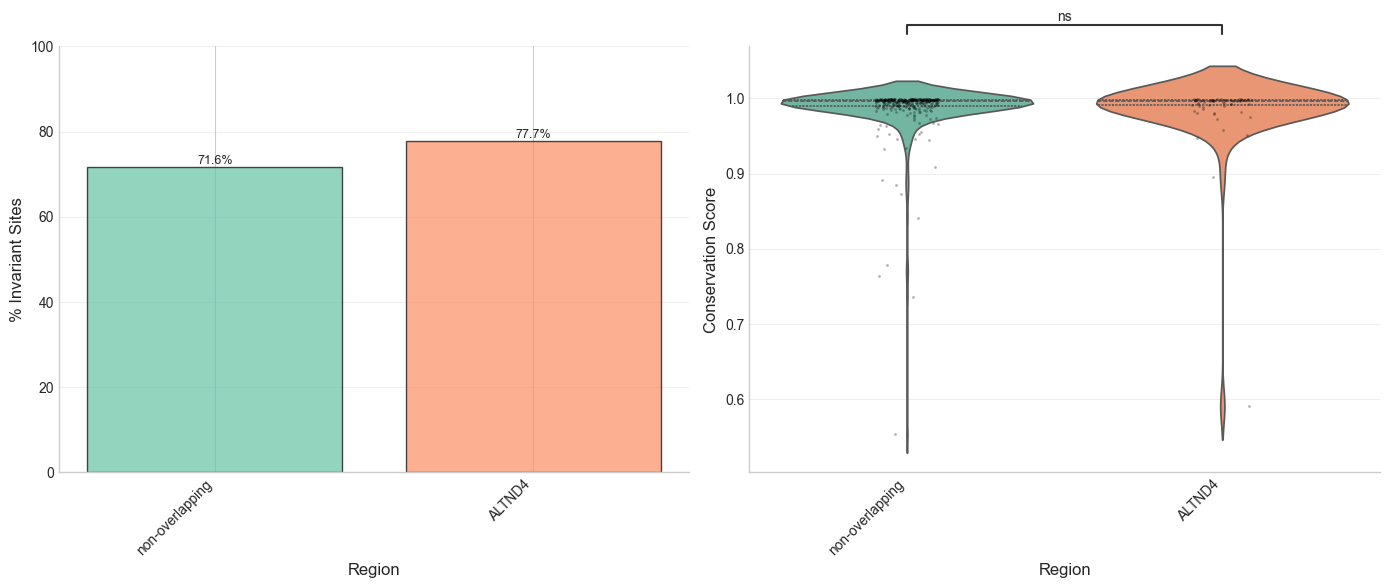

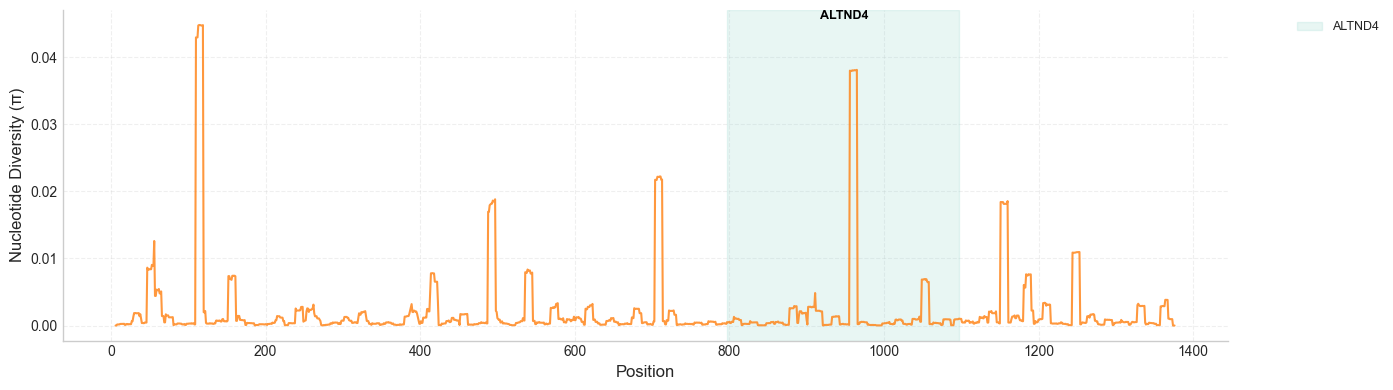

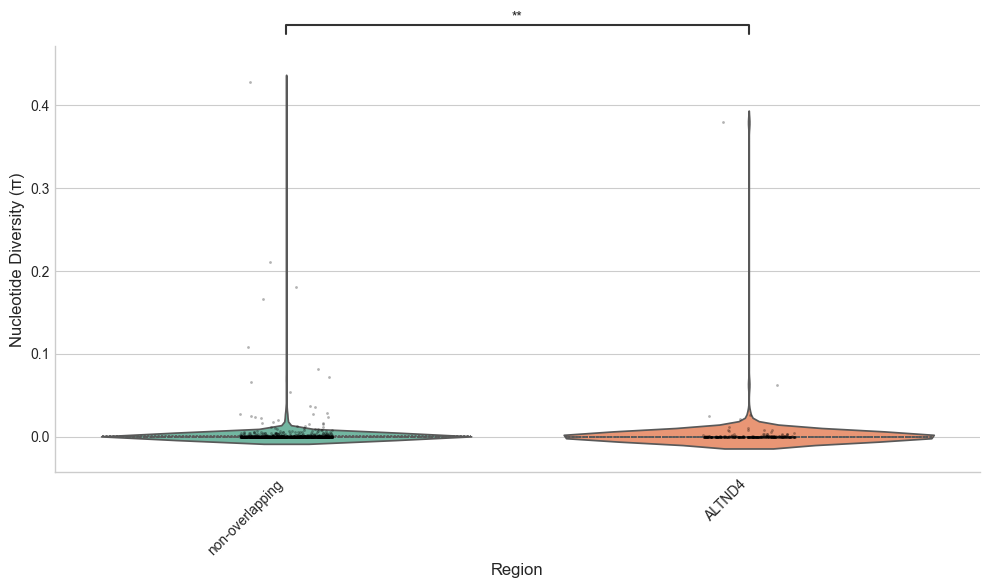

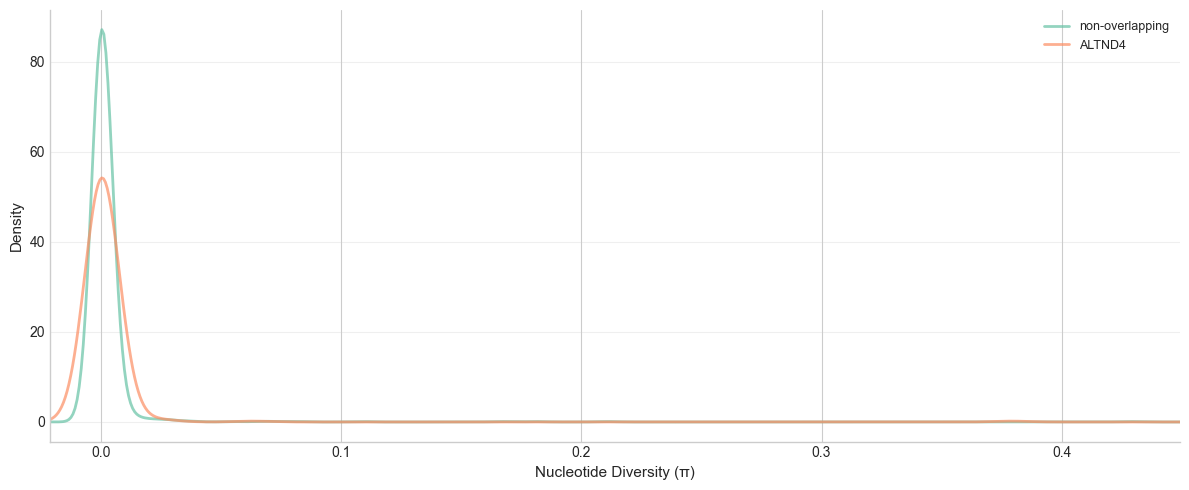

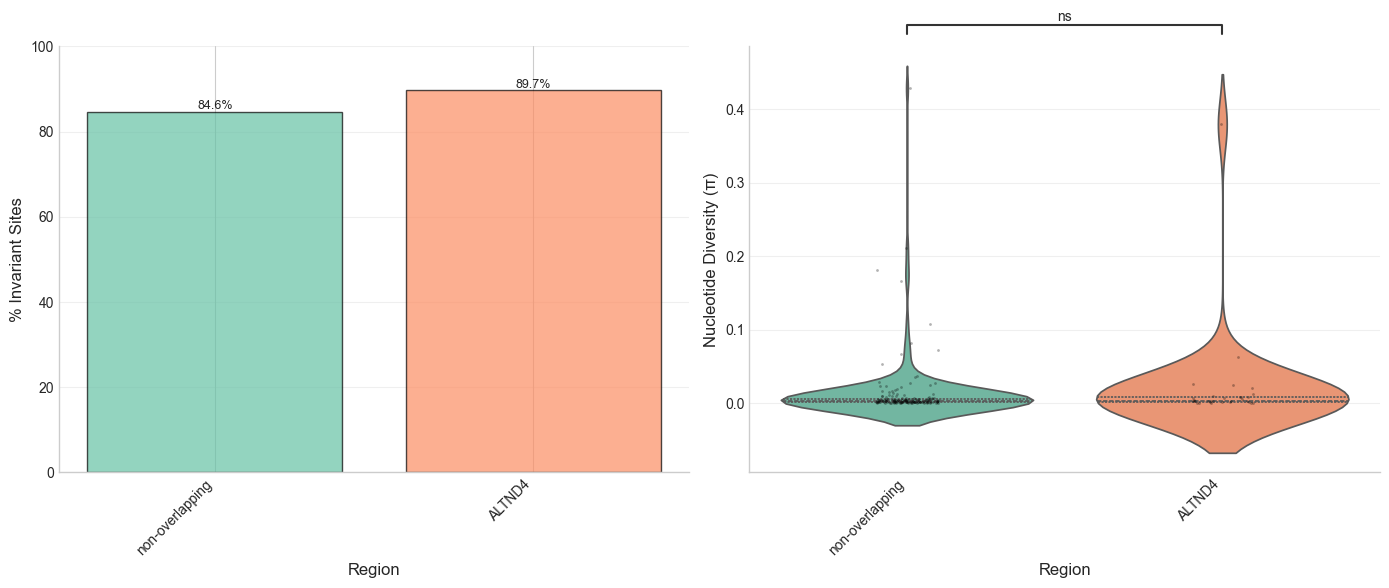

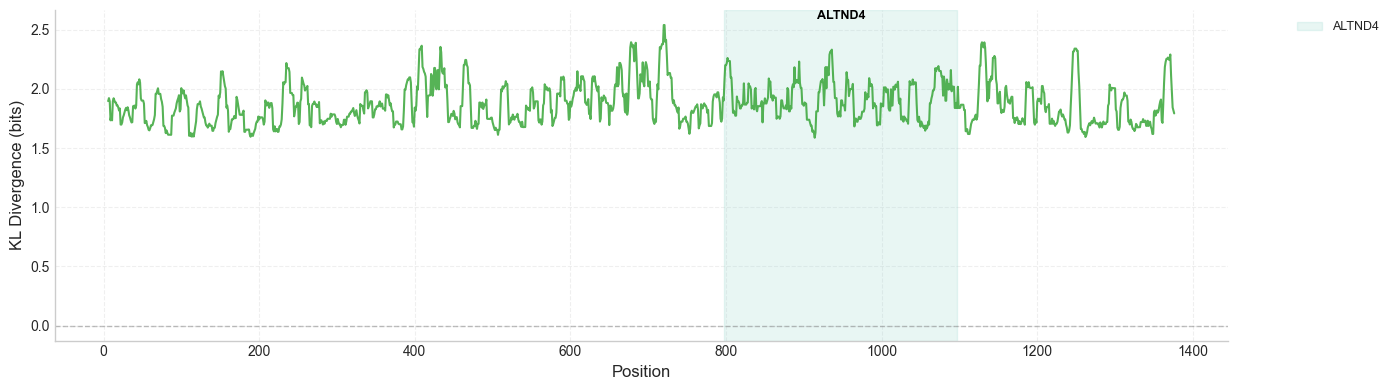

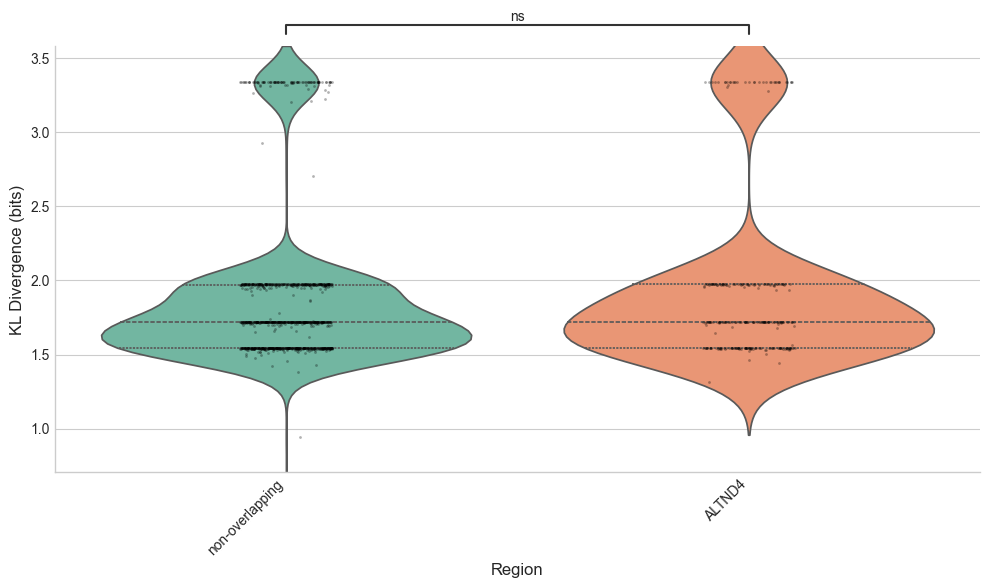

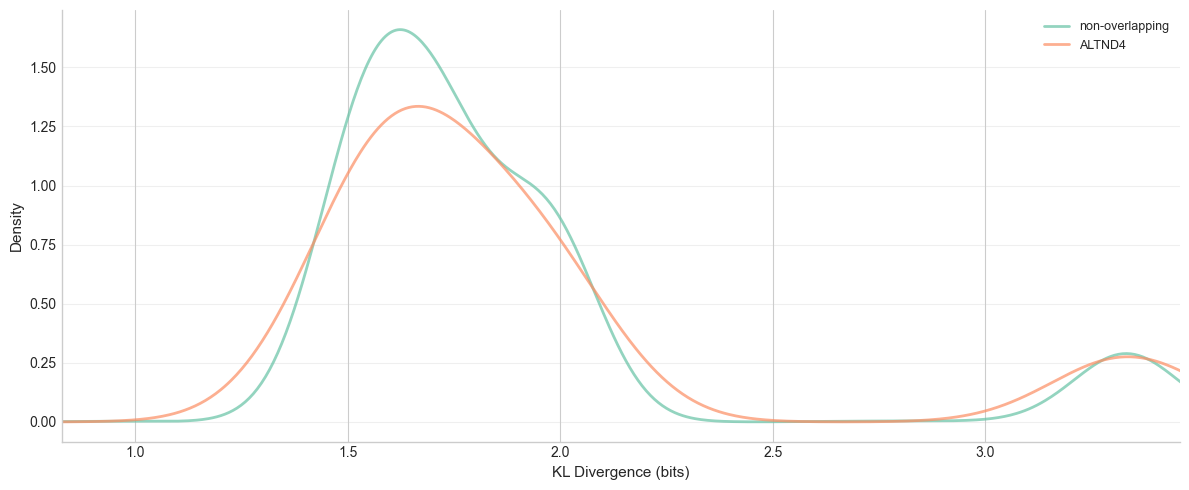

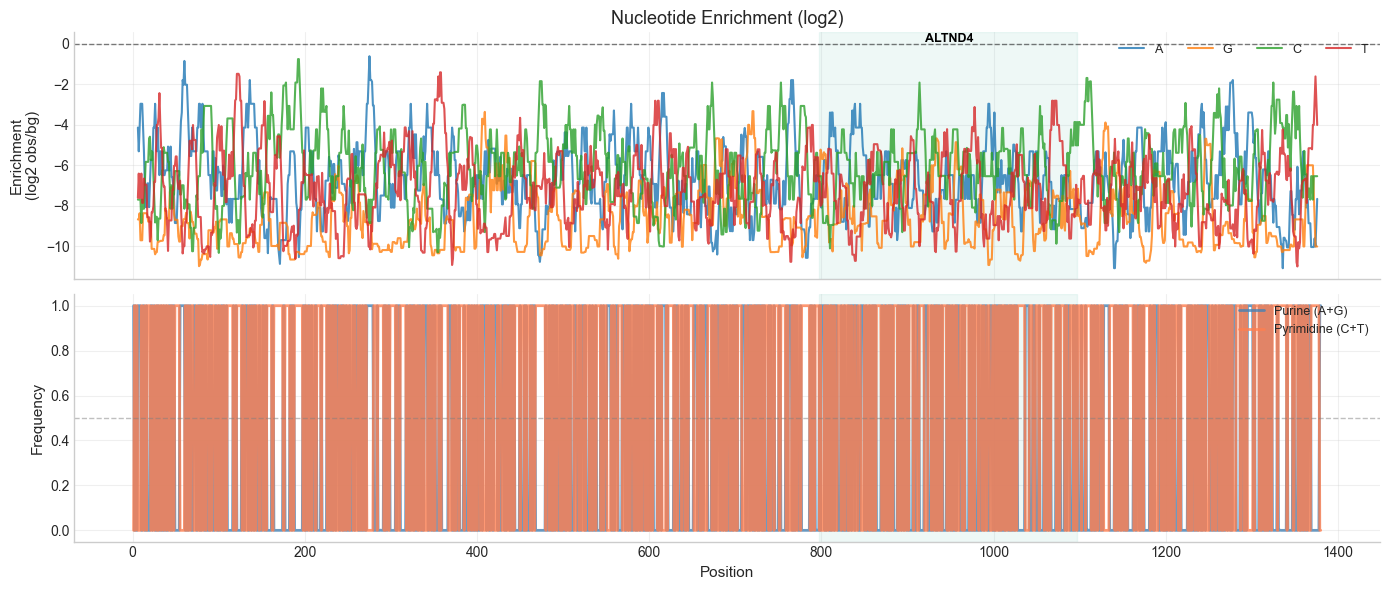

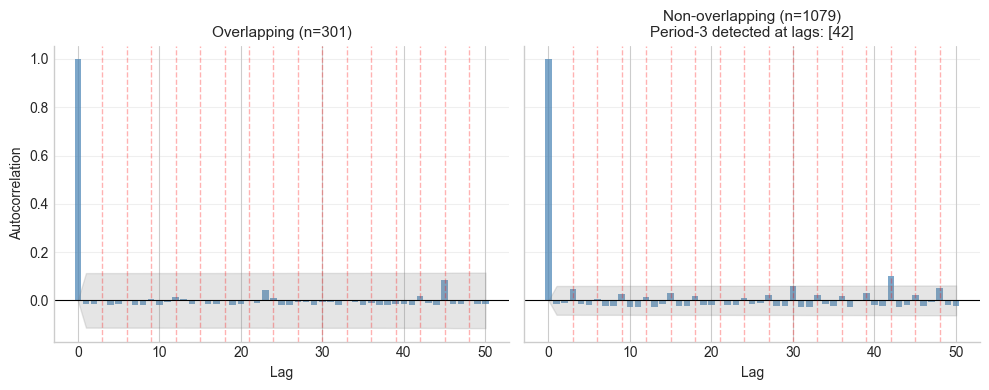

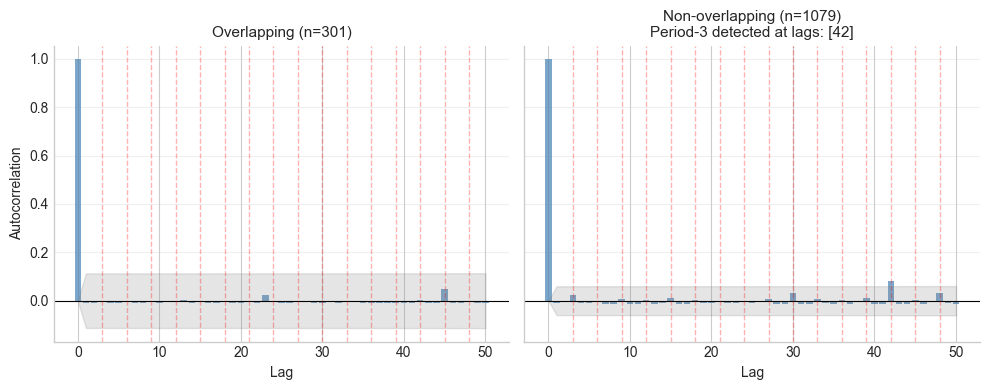

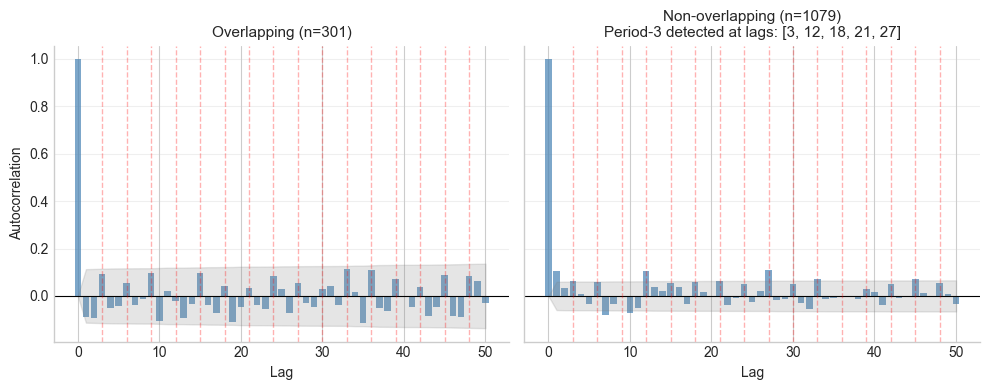

In [69]:
nd4_cons_profile = rcd.analyze_gene_regions(
    df = df,
    gene_col = 'ND4',
    overlapping_regions=relative_overlaps_dict['nad4_overlaps_rel'],
    calculate_conservation= True,
    calculate_diversity= True,
    calculate_kl_divergence = True,
    calculate_composition= True,
    run_autocorrelation=True,
    plot_density_comparison= True,
    plot_split_view= True,
    plot_results= True,
    window_size = 10,
    compare_distributions= True,
    output_dir=os.path.join(PATH, 'figures', 'revision', 'conservation_analysis_nd4'),
    show_title = False
    )

Calculating per-position conservation for CYTB...
Plotting conservation...
Comparing conservation distributions...
Creating conservation density comparison...
Creating conservation split-view comparison...
Calculating per-position diversity for CYTB...
Plotting diversity...
Comparing diversity distributions...
Creating diversity density comparison...
Creating diversity split-view comparison...
Calculating per-position KL divergence for CYTB...
Plotting KL divergence...
Comparing KL divergence distributions...
Creating KL divergence density comparison...
Calculating nucleotide composition enrichment for CYTB...
Plotting nucleotide enrichment...
Calculating autocorrelation for periodic pattern detection...
  - Conservation autocorrelation...
  - Diversity autocorrelation...
  - KL divergence autocorrelation...
Analysis complete!


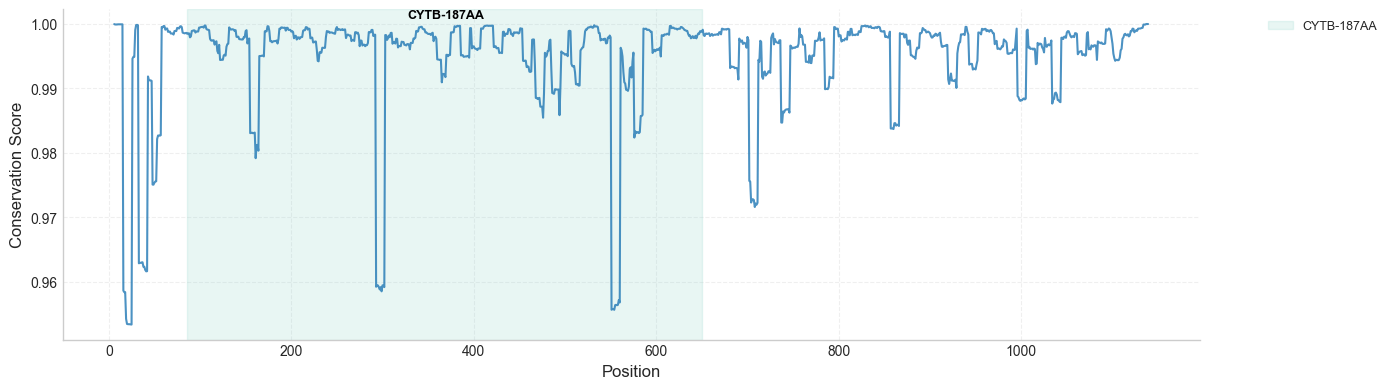

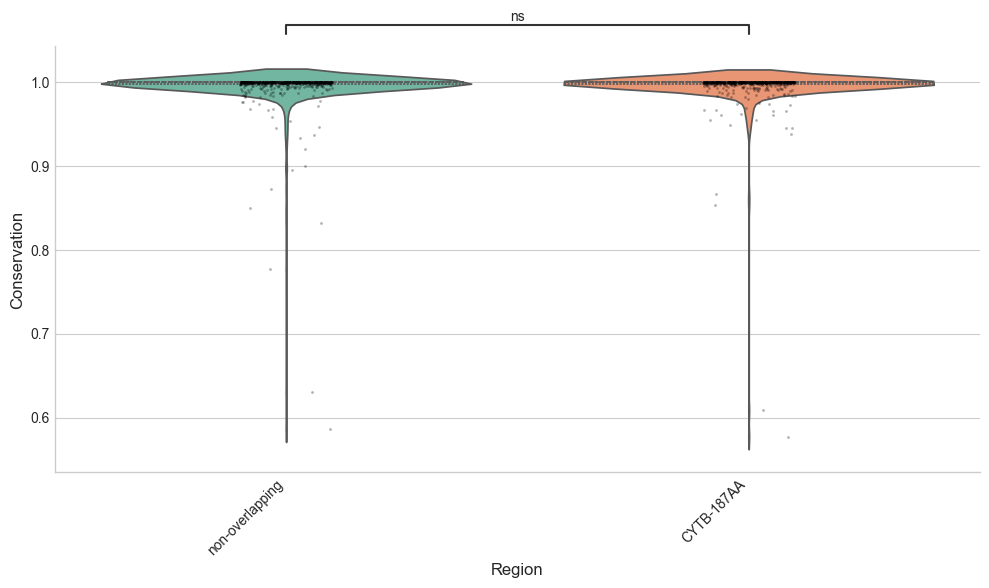

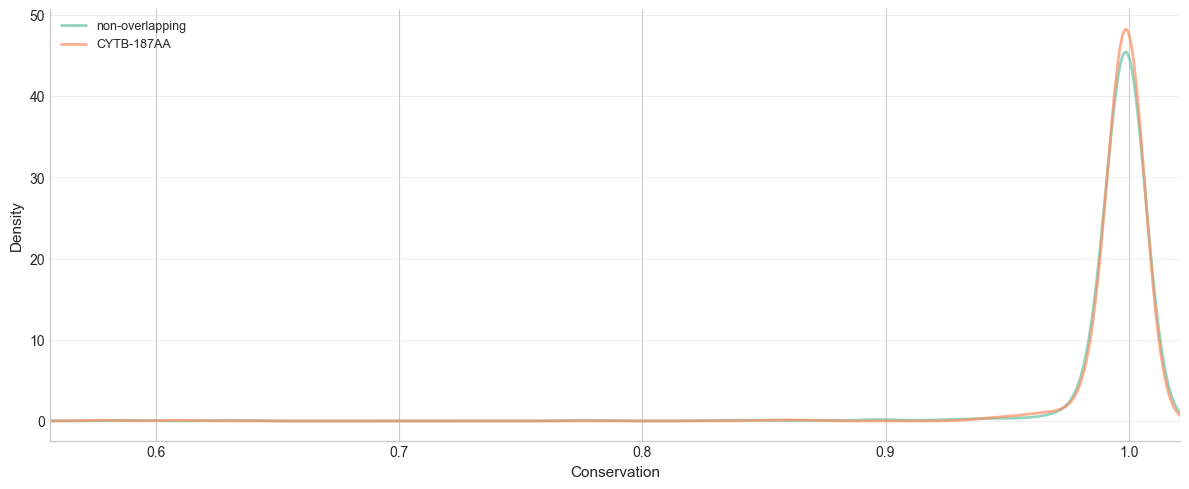

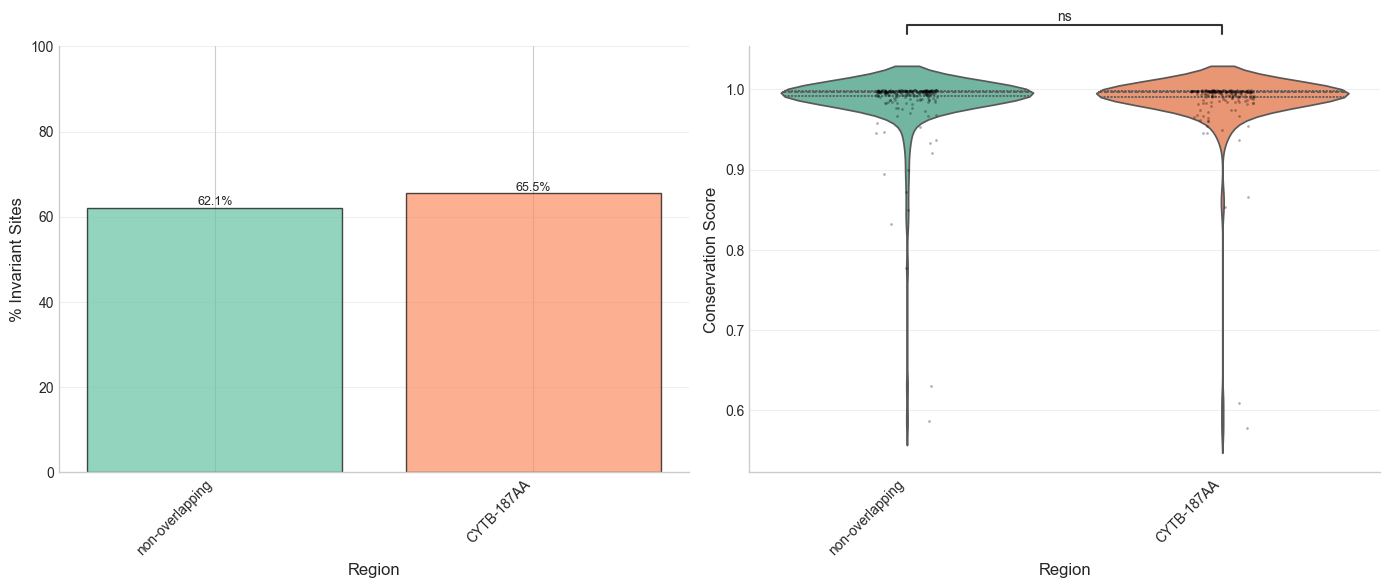

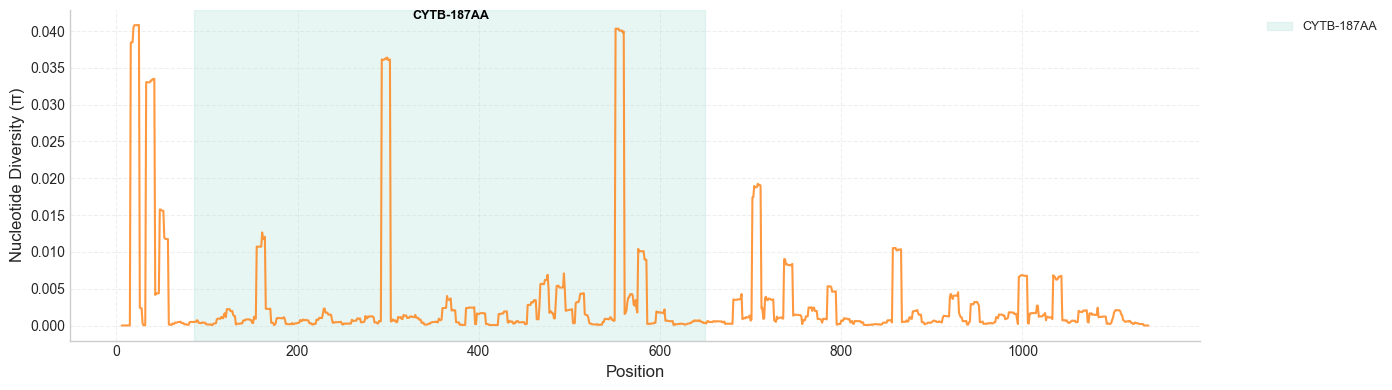

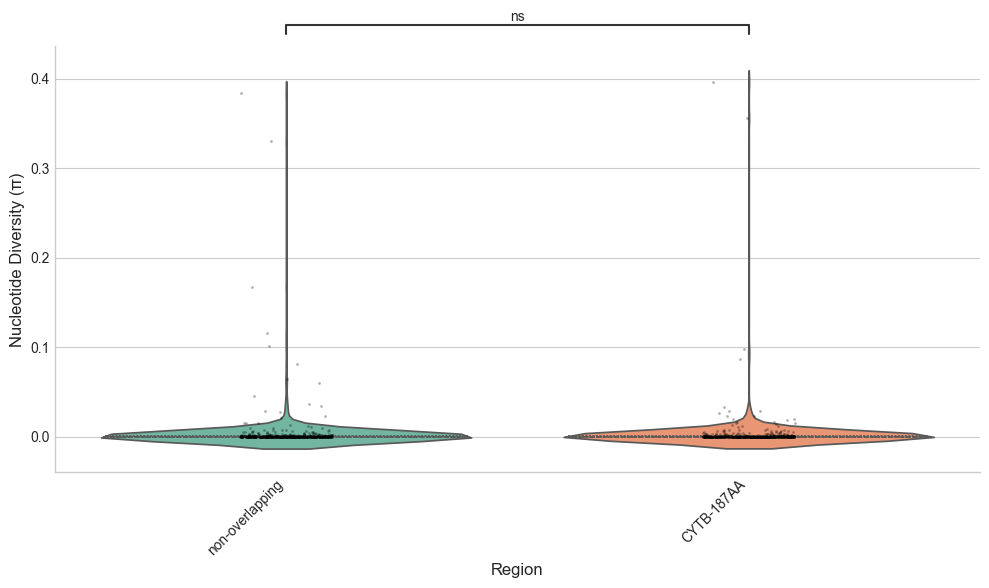

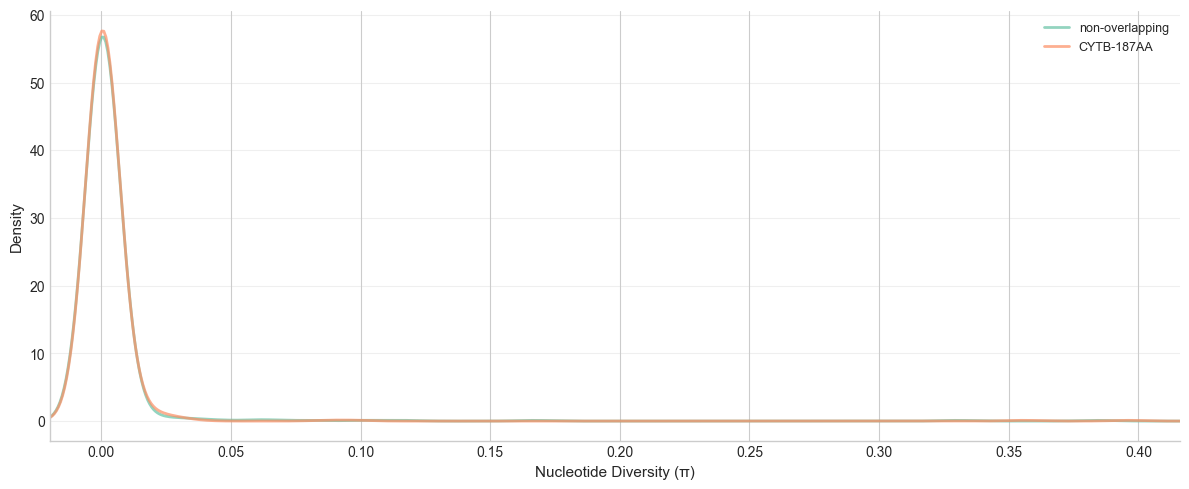

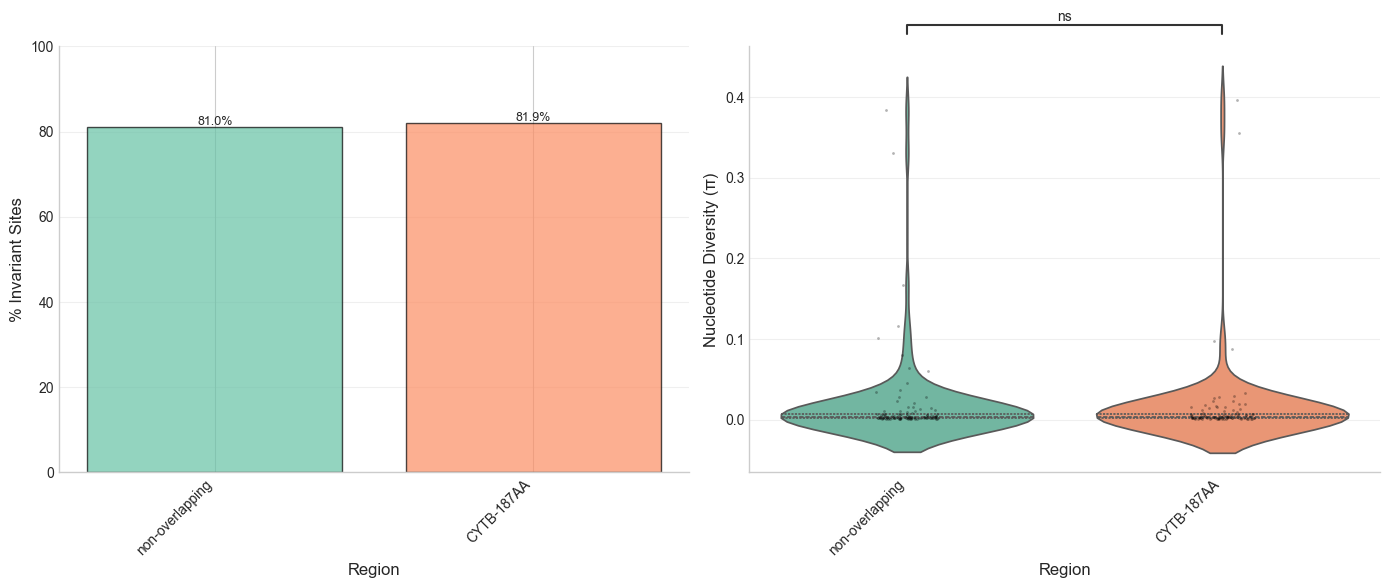

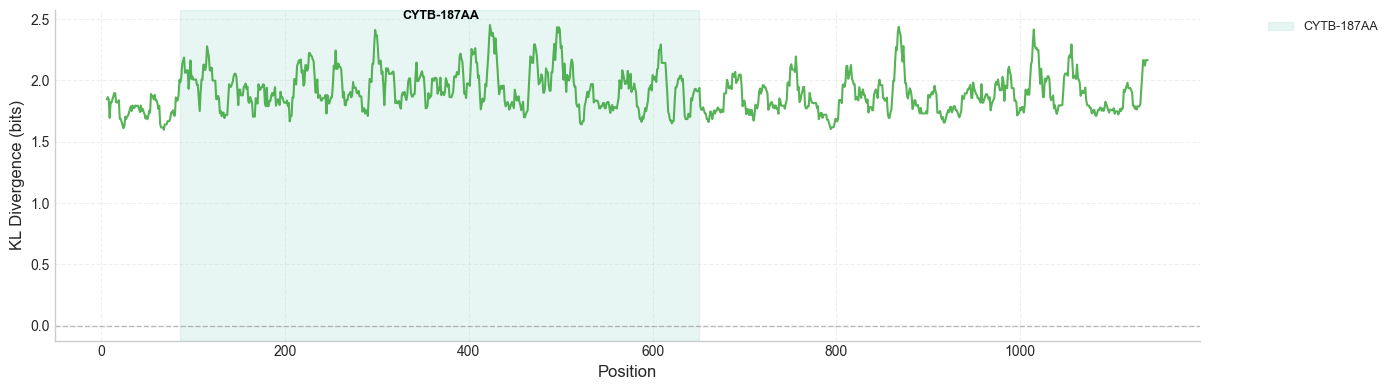

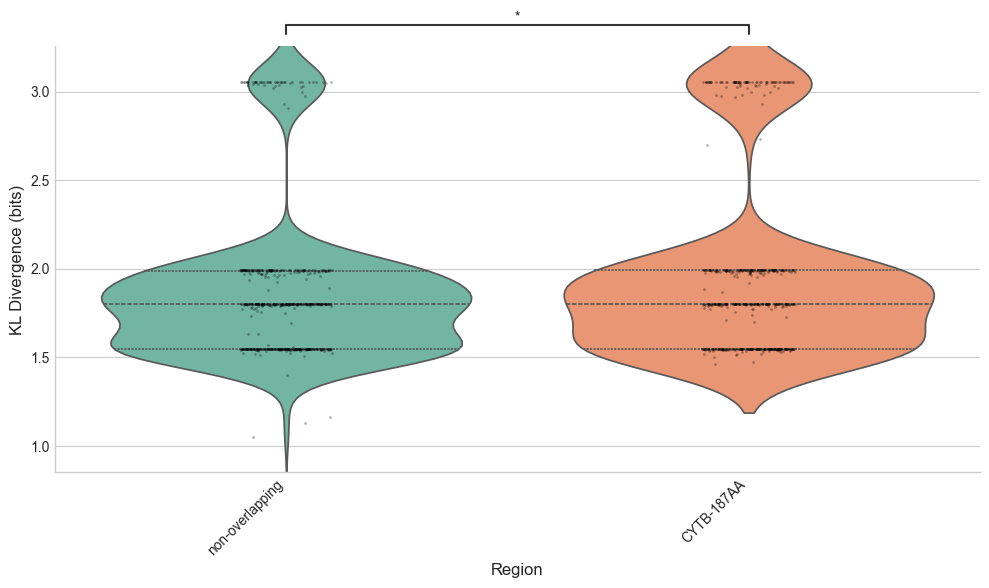

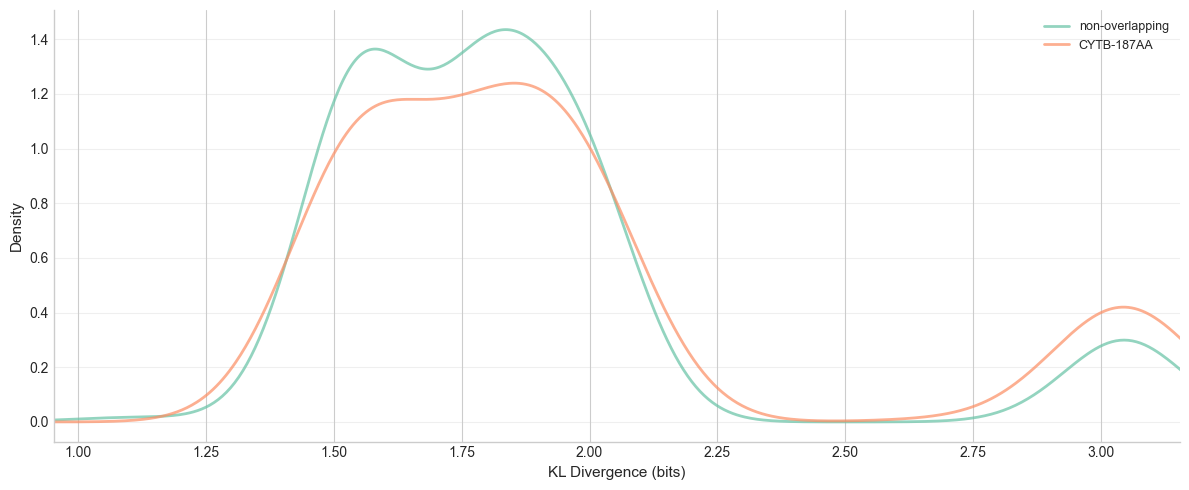

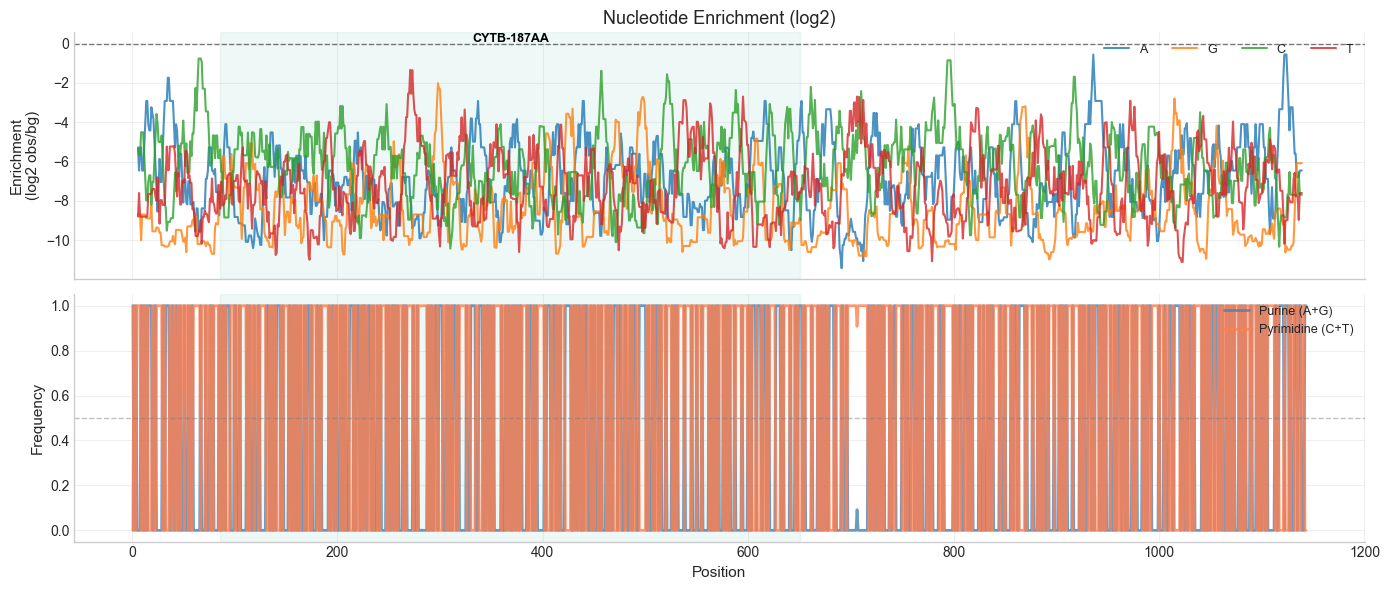

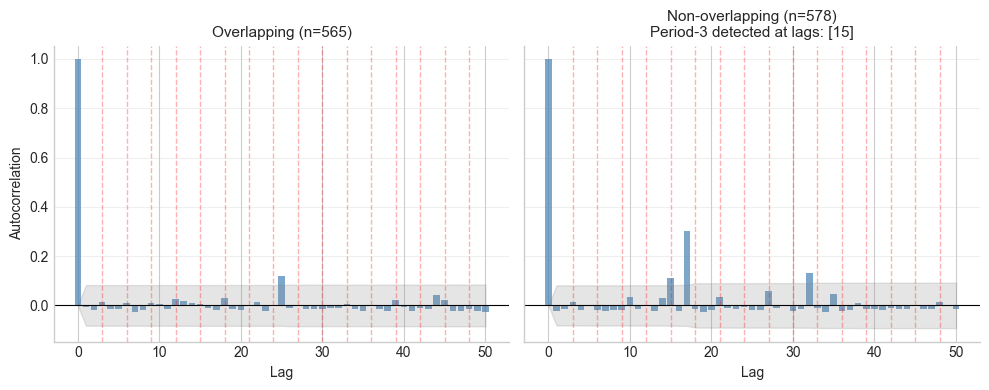

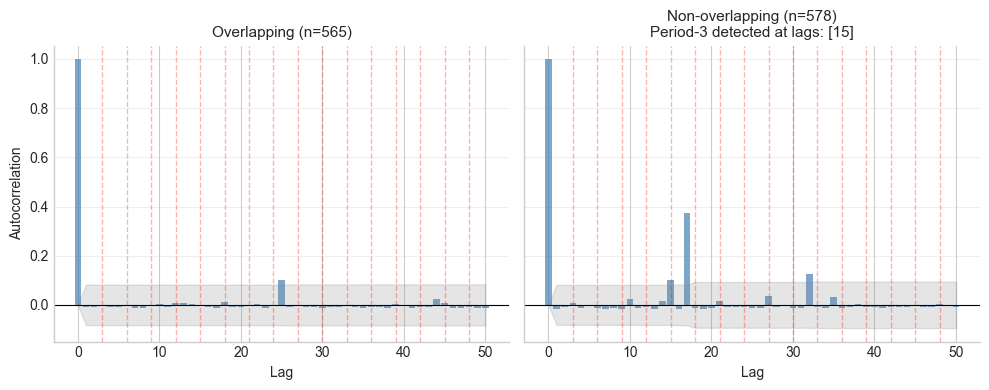

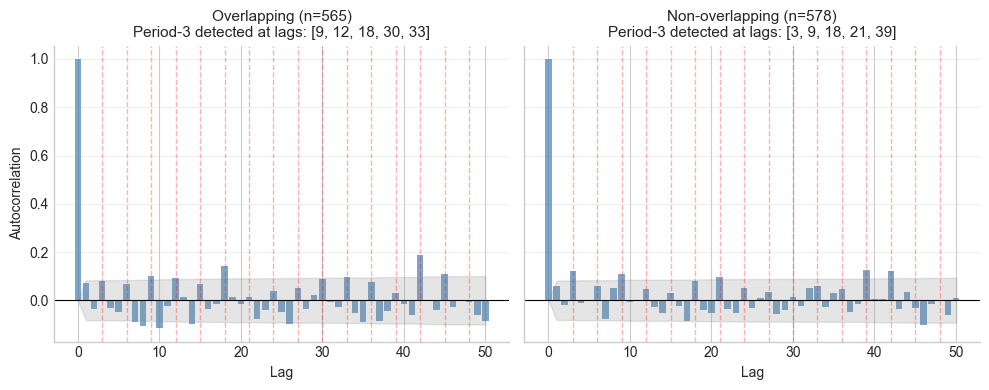

In [70]:
cyb_cons_profile = rcd.analyze_gene_regions(
    df = df,
    gene_col = 'CYTB',
    overlapping_regions=relative_overlaps_dict['cyb_overlaps_rel'],
    calculate_conservation= True,
    calculate_diversity= True,
    calculate_kl_divergence = True,
    calculate_composition= True,
    run_autocorrelation=True,
    plot_density_comparison= True,
    plot_split_view= True,
    plot_results= True,
    window_size = 10,
    compare_distributions= True,
    output_dir=os.path.join(PATH, 'figures', 'revision', 'conservation_analysis_cyb'),
    show_title = False
    )

In [102]:
df.columns

Index(['ID', 'RNR2', 'RNR1', 'ATP8', 'ATP6', 'ATP8_ATP6', 'ND4L_ND4', 'ND4',
       'ND4L', 'COX1', 'CYTB', 'TS2_TL2_ND5', 'ND1', 'ND2', 'ND3', 'ND5',
       'ND6', 'COX2', 'COX3', 'Hum_seq', 'SHLP3_seq', 'SHLP2_seq', 'SHLP4_seq',
       'SHLP1_seq', 'SHLP5_seq', 'SHLP6_seq', 'MOTC_seq', 'GAU_seq',
       'shmoose_seq', 'CO1_alt_seq', 'ND4_alt_seq', 'CYB_alt_seq',
       'ATP8_6_overlap_seq_upstream', 'ATP8_6_overlap_seq_downstream',
       'ND4L_4_overlap_seq_upstream', 'ND4L_4_overlap_seq_downstream',
       'organism'],
      dtype='object')

Calculating per-position conservation for TS2_TL2_ND5...
Plotting conservation...
Comparing conservation distributions...
Creating conservation density comparison...
Creating conservation split-view comparison...
Calculating per-position diversity for TS2_TL2_ND5...
Plotting diversity...
Comparing diversity distributions...
Creating diversity density comparison...
Creating diversity split-view comparison...
Calculating per-position KL divergence for TS2_TL2_ND5...
Plotting KL divergence...
Comparing KL divergence distributions...
Creating KL divergence density comparison...
Calculating nucleotide composition enrichment for TS2_TL2_ND5...
Plotting nucleotide enrichment...
Calculating autocorrelation for periodic pattern detection...
  - Conservation autocorrelation...
  - Diversity autocorrelation...
  - KL divergence autocorrelation...
Analysis complete!


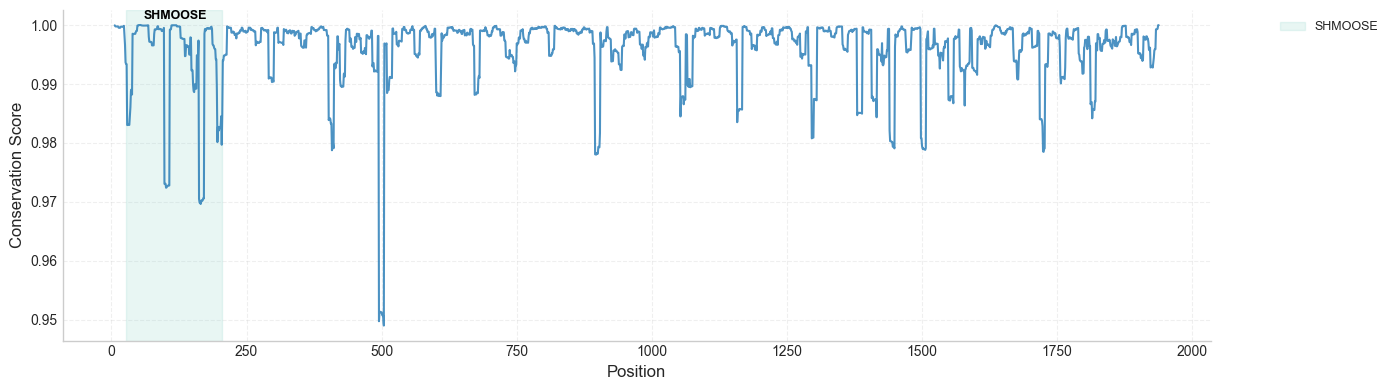

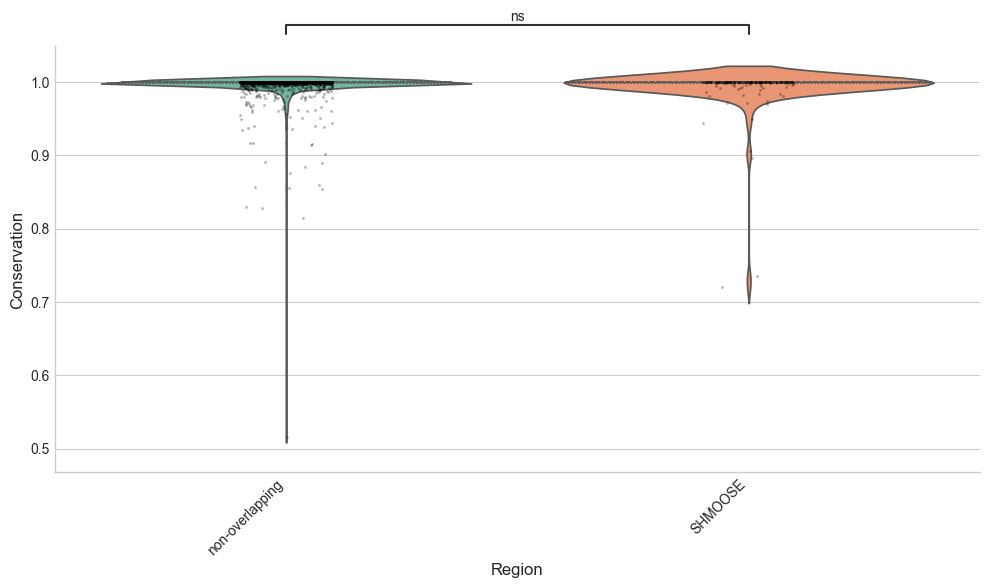

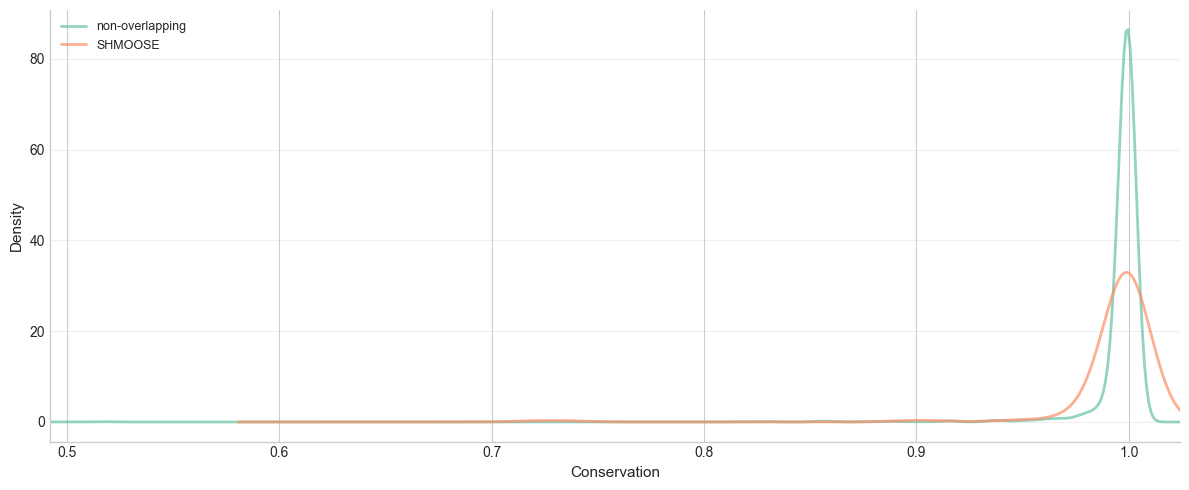

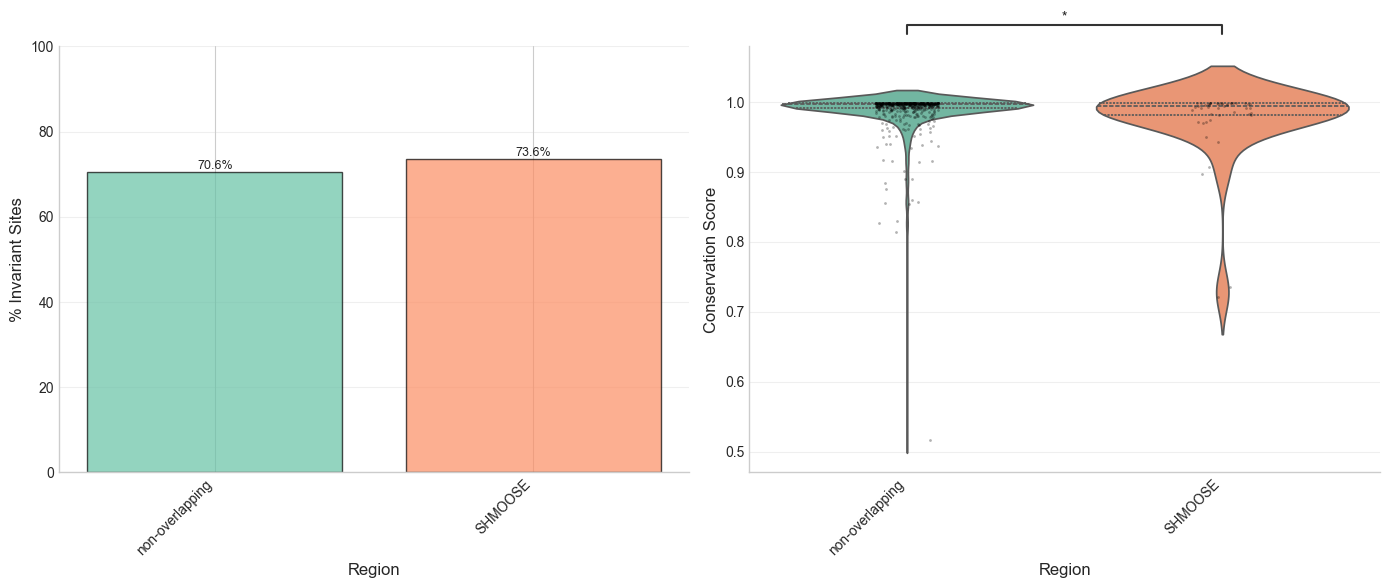

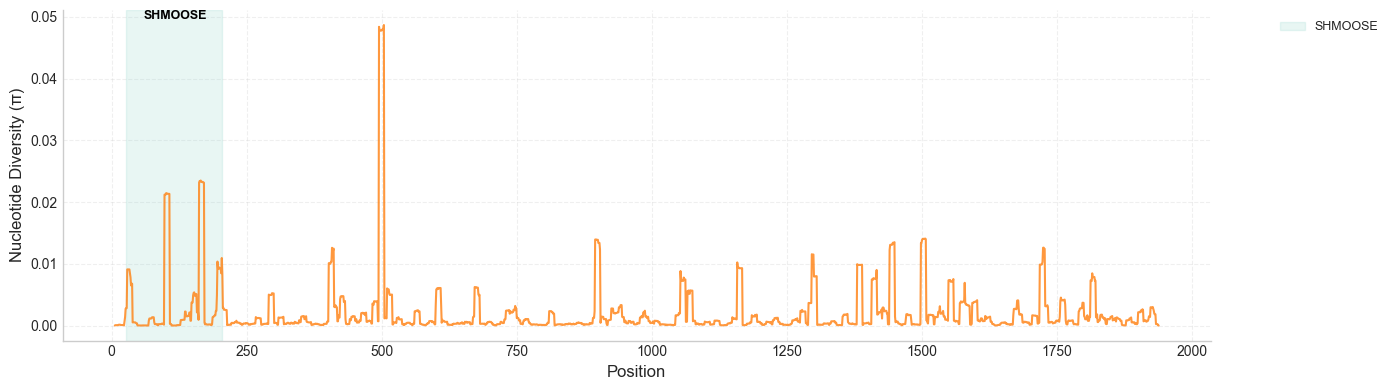

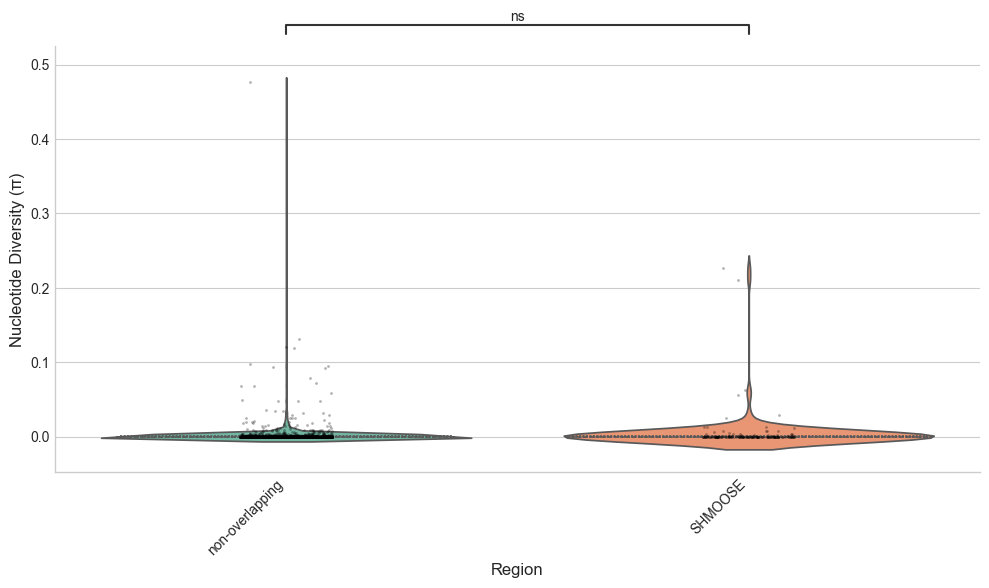

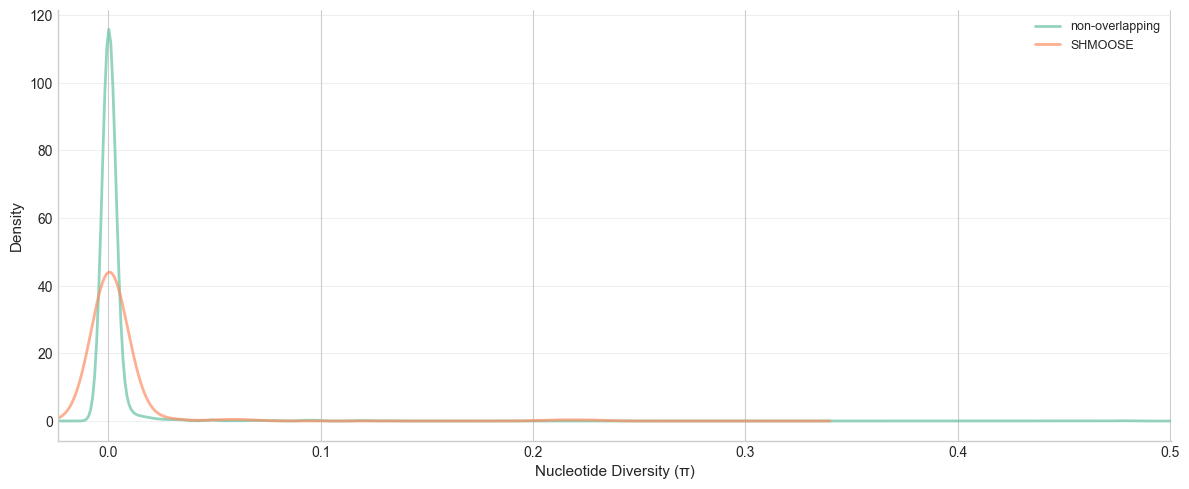

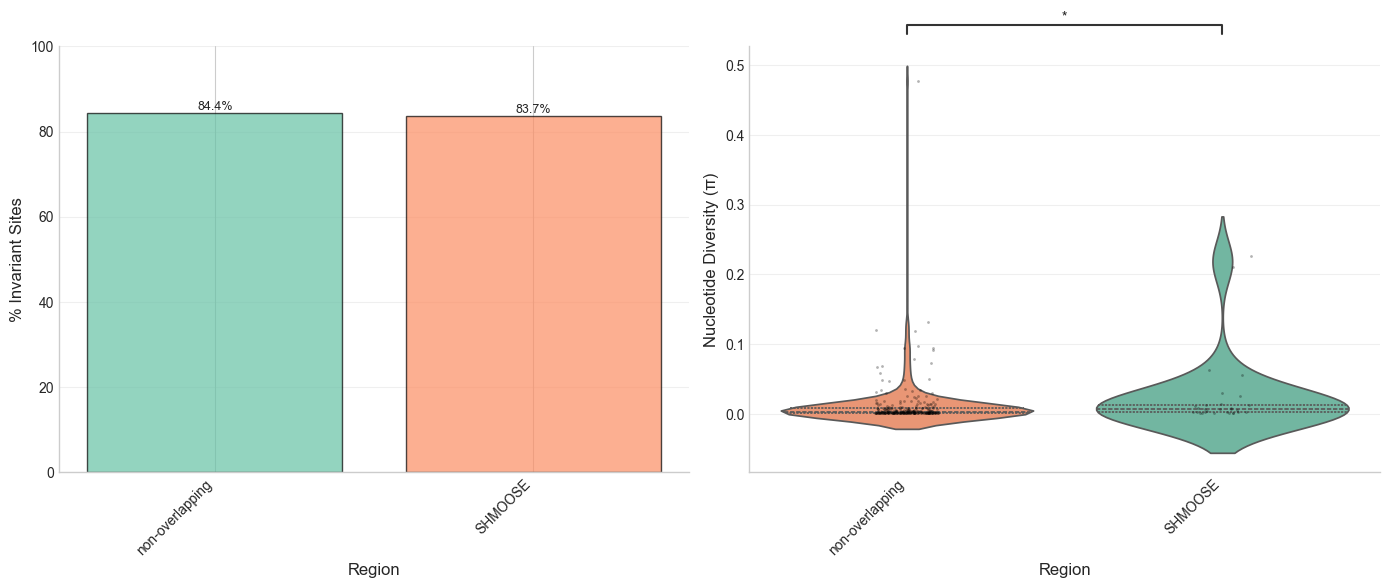

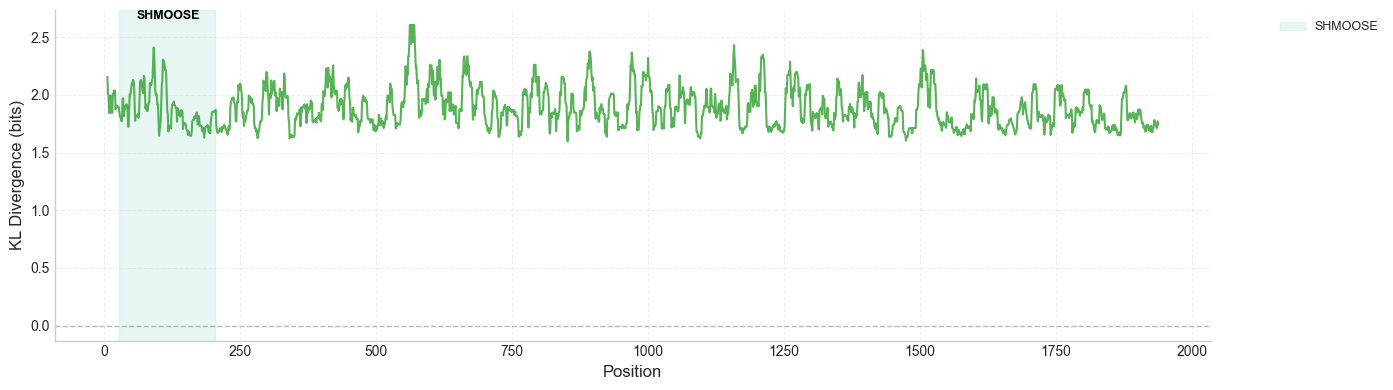

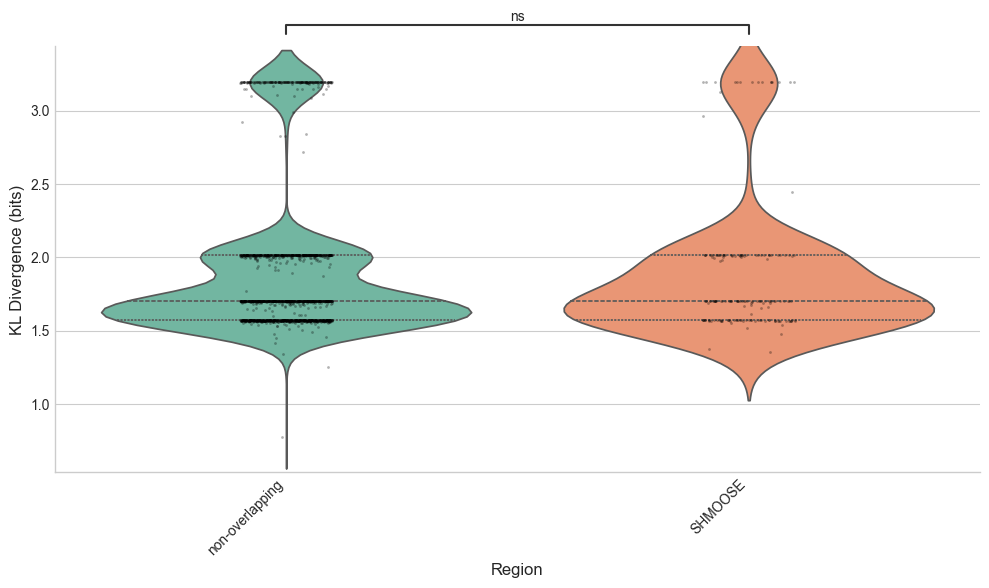

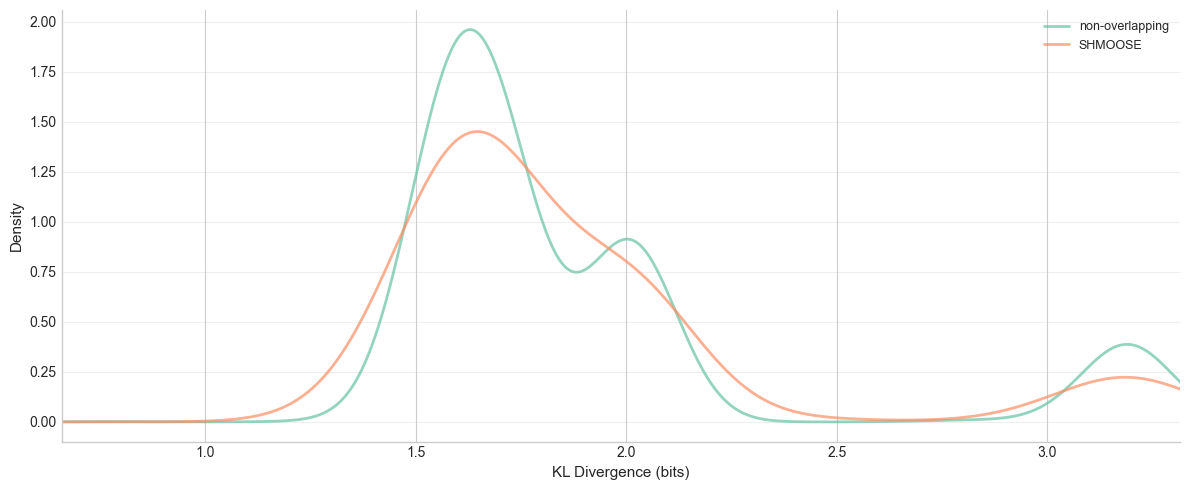

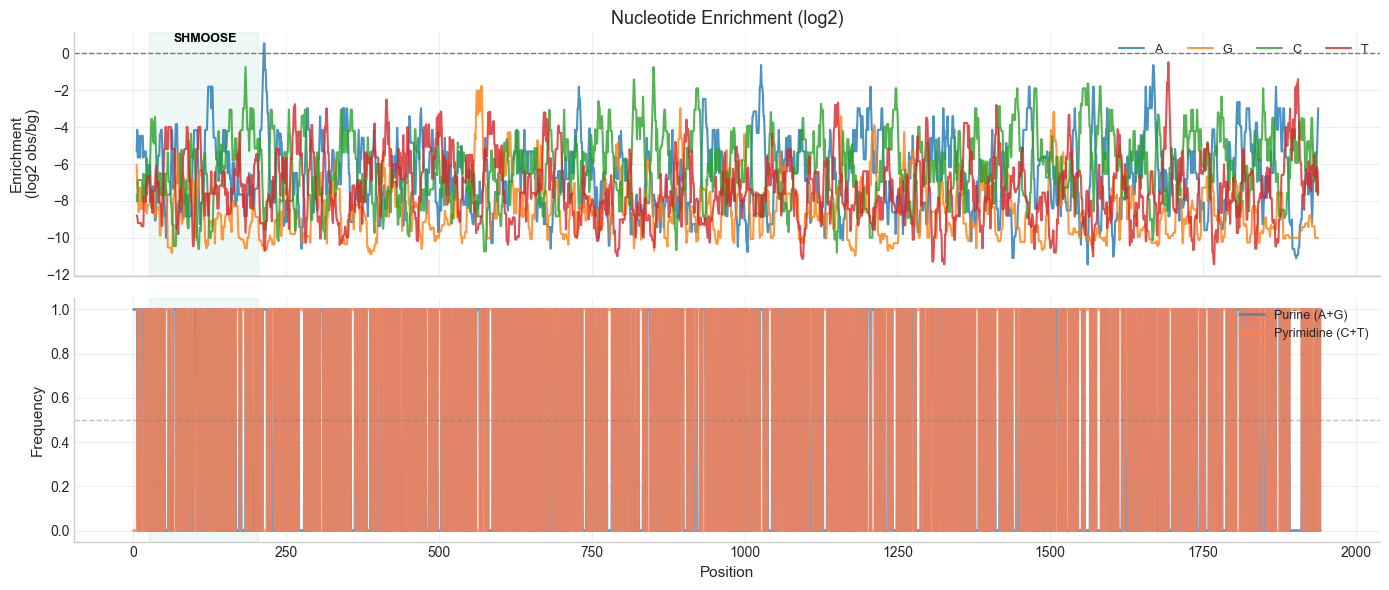

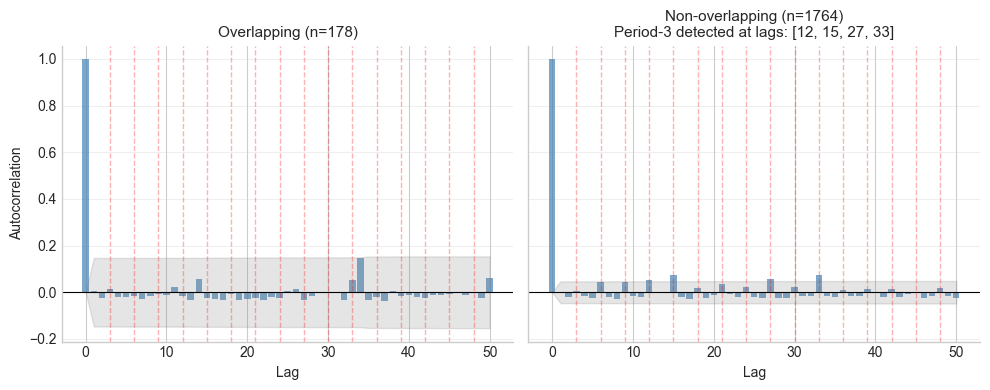

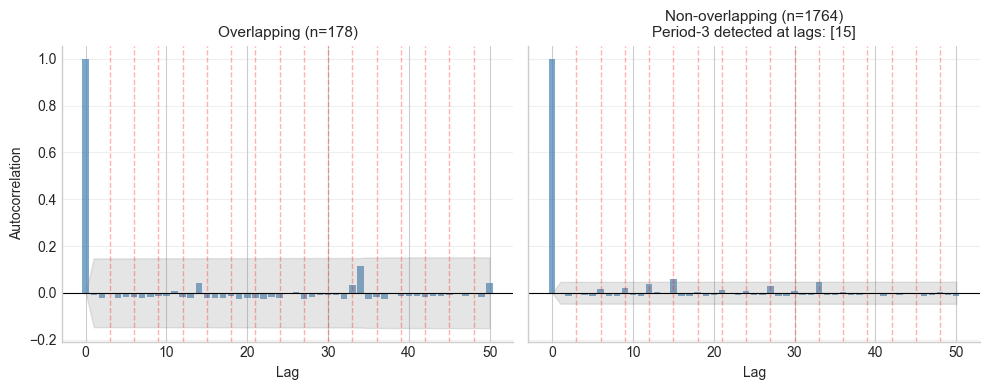

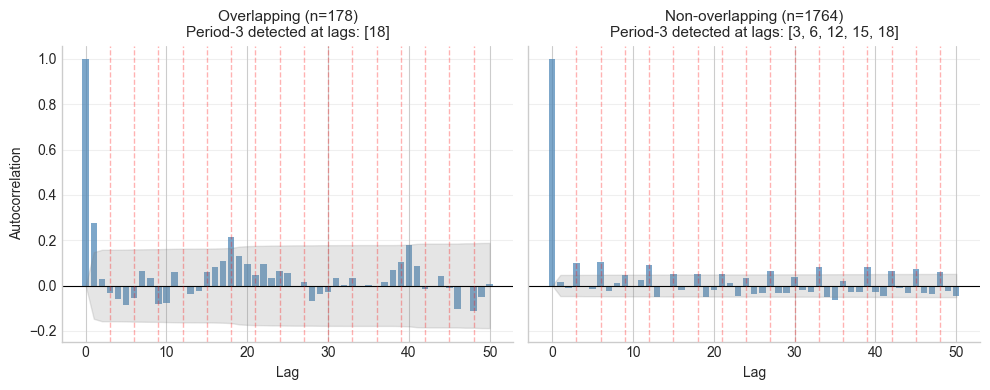

In [103]:
shmoose_cons_profile = rcd.analyze_gene_regions(
    df = df,
    gene_col = 'TS2_TL2_ND5',
    overlapping_regions=relative_overlaps_dict['shmoose_overlaps_rel'],
    calculate_conservation= True,
    calculate_diversity= True,
    calculate_kl_divergence = True,
    calculate_composition= True,
    run_autocorrelation=True,
    plot_density_comparison= True,
    plot_split_view= True,
    plot_results= True,
    window_size = 10,
    compare_distributions= True,
    output_dir=os.path.join(PATH, 'figures', 'revision', 'conservation_analysis_shmoose'),
    show_title = False
    )

In [ ]:
rename_regions = {'ALTND4' : 'MTALT-ND4', 'ALTCO1' : 'MTALT-CO1'}


gene      region  non_overlap_pct  overlap_pct  pct_difference  \
0          RNR2         Hum        85.351562    86.842105        1.490543   
1          RNR2       SHLP1        85.351562    91.891892        6.540329   
2          RNR2       SHLP2        85.351562    86.585366        1.233803   
3          RNR2       SHLP3        85.351562    78.813559       -6.538003   
4          RNR2       SHLP4        85.351562    95.121951        9.770389   
5          RNR2       SHLP5        85.351562    84.210526       -1.141036   
6          RNR2       SHLP6        85.351562    96.875000       11.523438   
7          RNR1       MOTSc        84.811530    80.769231       -4.042299   
8          COX1      ALTCO1        74.375821    74.135723       -0.240098   
9           ND4      ALTND4        71.640408    77.740864        6.100456   
10         CYTB  CYTB-187AA        62.110727    65.486726        3.375999   
11  TS2_TL2_ND5     SHMOOSE        70.578231    73.595506        3.017274   

    mann_whitney_statistic  pvalue_raw  pvalue_corrected  significant  
0                    656.0    0.509839          0.753947        False  
1                     51.0    0.015347          0.092080        False  
2                    841.0    0.917285          0.951938        False  
3                   2270.0    0.092539          0.255799        False  
4                    306.0    0.951938          0.951938        False  
5                    989.0    0.571405          0.753947        False  
6                    291.0    0.005228          0.062740        False  
7                    551.0    0.304409          0.608817        False  
8                  21540.0    0.106583          0.255799        False  
9                   9863.5    0.628289          0.753947        False  
10                 22329.0    0.421909          0.723272        False  
11                 14438.5    0.036809          0.147235        False

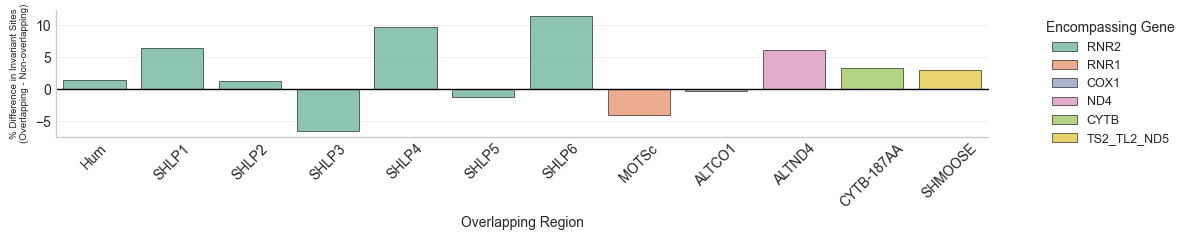

In [110]:
reload(rcd)
stats_list_splitview = [rnr2_cons_profile['conservation_splitview_stats'],
                       rnr1_cons_profile['conservation_splitview_stats'],
                       cox1_cons_profile['conservation_splitview_stats'],
                       nd4_cons_profile['conservation_splitview_stats'],
                       cyb_cons_profile['conservation_splitview_stats'],
                       shmoose_cons_profile['conservation_splitview_stats']
                       ]
gene_names = ['RNR2', 'RNR1', 'COX1', 'ND4', 'CYTB', 'TS2_TL2_ND5']

fig, summary_df = rcd.plot_mdp_invariant_sites_summary(
    stats_list=stats_list_splitview,
    gene_names=gene_names,
    output_path =os.path.join(PATH, 'figures', 'revision', 'mdp_invariant_sites_summary.'),
    show_title = False,
    figsize = (12, 2.5)
)
display(summary_df)